<a href="https://colab.research.google.com/github/adesababs/Computational-Geophysics/blob/main/FFT_Moving_Average_Gravity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fourier Transform and Moving Average Method for 2D Slice Gravity (Case Studi: Kulap Terpadu Gondang)**

---



This Gravity data is sample data from the measurement results of Integrated Field Study by Geophysical Engineering ITS, in the area of Mount Pandan and its surroundings. I will try to do the Fast Fourier Transform process using Python.

Before FFT, the first step is to make a cross-section by way of slicing using Surfer software. Gravity anomaly data do a certain spacing grid with as many as 2n, adapted to the source of the anomaly to be separated. The purpose of the 2D Fourier transform is to carry synthetic data residing on the spatial region to the frequency region so that it can be processed further, which is spectrum analysis.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Data**

In [ ]:
data = np.loadtxt('/content/Gravity_UTM.txt')
utm_x = np.array(data[:,0])
utm_y = np.array(data[:,1])
CBA = np.array(data[:,2])

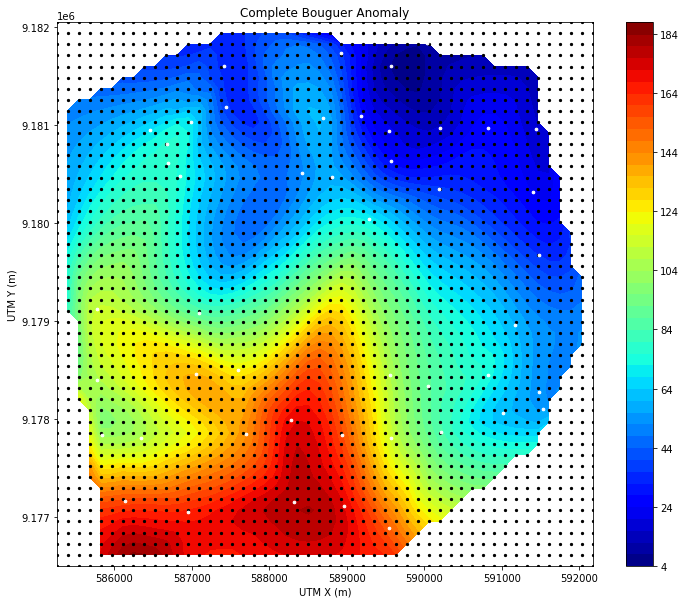

In [ ]:
import scipy
from scipy.interpolate import griddata

xi = np.linspace(min(utm_x), max(utm_x), 50)
yi = np.linspace(min(utm_y), max(utm_y), 50)
xi, yi = np.meshgrid(xi, yi)
# Interpolasi
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
# plot kontur CBA
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.scatter(xi, yi, s=5, color='black')

# plot stations dengan STATION NUMBERS, mulai dari 0
n = np.arange(0,len(utm_x), 1)
ax.scatter(utm_x, utm_y, s=7, color='white')

# for i, txt in enumerate(n):
#     ax.annotate(txt, (utm_x[i], utm_y[i]), size=12)

#      Southwest-Northeast Slice

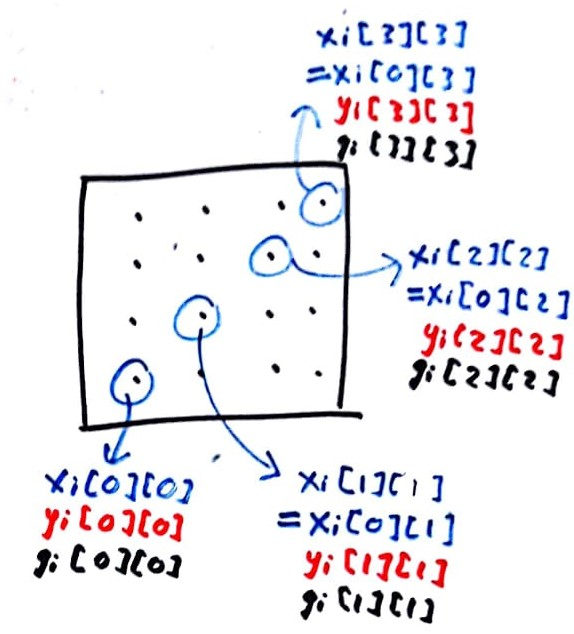


In [ ]:
# SW-NE slice
x_slice = np.array(xi[0])
print('Coordinate slice in X direction:', x_slice)

y_slice = []
for k in range(len(x_slice)):
  yslice = yi[k][k]
  y_slice.append(float(yslice))
y_slice = np.array(y_slice)
print('Coordinate slice in Y direction:', y_slice)

g_slice = []
for k in range(len(x_slice)):
  gslice = zi[k][k]
  g_slice.append(float(gslice))
g_slice = np.array(g_slice)
print('CBA on slice:', g_slice)

Coordinate slice in X direction: [585263.0177     585404.01888776 585545.02007551 585686.02126327
 585827.02245102 585968.02363878 586109.02482653 586250.02601429
 586391.02720204 586532.0283898  586673.02957755 586814.03076531
 586955.03195306 587096.03314082 587237.03432857 587378.03551633
 587519.03670408 587660.03789184 587801.03907959 587942.04026735
 588083.0414551  588224.04264286 588365.04383061 588506.04501837
 588647.04620612 588788.04739388 588929.04858163 589070.04976939
 589211.05095714 589352.0521449  589493.05333265 589634.05452041
 589775.05570816 589916.05689592 590057.05808367 590198.05927143
 590339.06045918 590480.06164694 590621.06283469 590762.06402245
 590903.0652102  591044.06639796 591185.06758571 591326.06877347
 591467.06996122 591608.07114898 591749.07233673 591890.07352449
 592031.07471224 592172.0759    ]
Coordinate slice in Y direction: [9176496.816      9176610.08355102 9176723.35110204 9176836.61865306
 9176949.88620408 9177063.1537551  9177176.42130612

**Memvisualisasikan Slice**

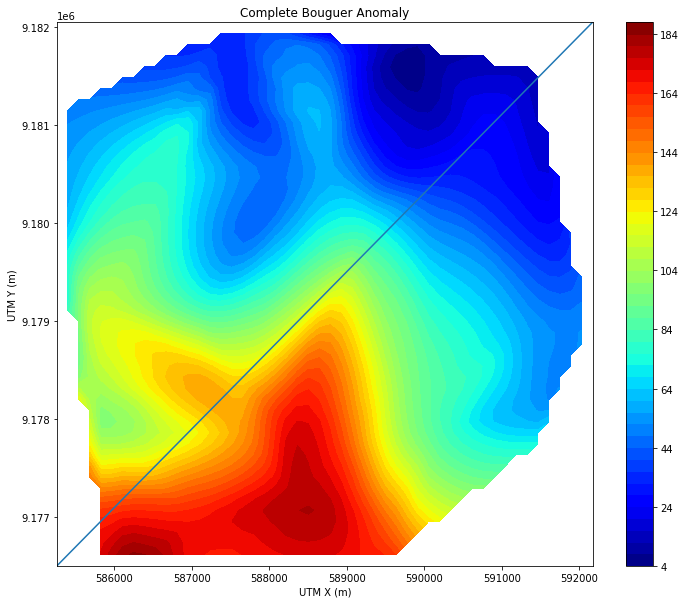

In [ ]:
import scipy
from scipy.interpolate import griddata

xi = np.linspace(min(utm_x), max(utm_x), 50)
yi = np.linspace(min(utm_y), max(utm_y), 50)
xi, yi = np.meshgrid(xi, yi)
# Interpolasi
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
# plot kontur CBA
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.plot(x_slice, y_slice)

#Data Preparation for FFT

**Membuat DataFrame**

In [ ]:
data = pd.DataFrame({"UTM_X": x_slice, "UTM_Y": y_slice, "CBA": g_slice})
data.head(10)

,UTM_X,UTM_Y,CBA
0,585263.017700,9.176497e+06,NaN
1,585404.018888,9.176610e+06,NaN
2,585545.020076,9.176723e+06,NaN
3,585686.021263,9.176837e+06,NaN
4,585827.022451,9.176950e+06,165.660482
5,585968.023639,9.177063e+06,161.669018
6,586109.024827,9.177176e+06,155.559255
7,586250.026014,9.177290e+06,146.441055
8,586391.027202,9.177403e+06,136.066867
9,586532.028390,9.177516e+06,128.104311


**Menghapus NaN dari DataFrame**

In [ ]:
# mencari jumlah baris yang memiliki data NaN
print("Original size of data:", len(data), "rows")
print("How many data with NaN values?")
print(data.isnull().sum())

# drop rows dengan missing values
data.dropna(inplace=True)
# re-index dataframe
data = data.reset_index(drop=True)
print("NaN has successfully been deleted")
data.head(10)

Original size of data: 50 rows
How many data with NaN values?
UTM_X    0
UTM_Y    0
CBA      9
dtype: int64
NaN has successfully been deleted


,UTM_X,UTM_Y,CBA
0,585827.022451,9.176950e+06,165.660482
1,585968.023639,9.177063e+06,161.669018
2,586109.024827,9.177176e+06,155.559255
3,586250.026014,9.177290e+06,146.441055
4,586391.027202,9.177403e+06,136.066867
5,586532.028390,9.177516e+06,128.104311
6,586673.029578,9.177629e+06,124.035238
7,586814.030765,9.177743e+06,120.329355
8,586955.031953,9.177856e+06,120.256108
9,587096.033141,9.177969e+06,126.817633


**Menghitung Interval pada Slice**

In [ ]:
# menghitung jarak pada slice dari the titik pertama pada slice
dist_x = np.array([j-i for i, j in zip(data.UTM_X[:-1], data.UTM_X[1:])])
dist_y = np.array([j-i for i, j in zip(data.UTM_Y[:-1], data.UTM_Y[1:])])
dist = np.sqrt((dist_x**2) + (dist_y**2))
dist = np.cumsum(dist)
dist = np.append(0, dist)

**Memasukkan Interval ke dalam DataFrame**

In [ ]:
data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": dist})
data.head(10)

,UTM_X,UTM_Y,CBA,Interval
0,585827.022451,9.176950e+06,165.660482,0.000000
1,585968.023639,9.177063e+06,161.669018,180.861475
2,586109.024827,9.177176e+06,155.559255,361.722950
3,586250.026014,9.177290e+06,146.441055,542.584424
4,586391.027202,9.177403e+06,136.066867,723.445899
5,586532.028390,9.177516e+06,128.104311,904.307374
6,586673.029578,9.177629e+06,124.035238,1085.168849
7,586814.030765,9.177743e+06,120.329355,1266.030324
8,586955.031953,9.177856e+06,120.256108,1446.891798
9,587096.033141,9.177969e+06,126.817633,1627.753273


#Fourier Transform

In [ ]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

fourier = np.fft.fft(data.CBA)
print(len(fourier))

41


In [ ]:
imaginary = fourier.imag
real = fourier.real
absolute = np.sqrt((imaginary**2) + (real**2))
ln_abs = np.log(absolute)

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute
0,585827.022451,9.176950e+06,165.660482,0.000000,3752.807292+0.000000j,3752.807292,0.000000,3752.807292,8.230259
1,585968.023639,9.177063e+06,161.669018,180.861475,-209.801928-1087.740414j,-209.801928,-1087.740414,1107.788814,7.010121
2,586109.024827,9.177176e+06,155.559255,361.722950,262.670851-408.557620j,262.670851,-408.557620,485.711133,6.185614
3,586250.026014,9.177290e+06,146.441055,542.584424,119.406986-220.743451j,119.406986,-220.743451,250.969519,5.525331
4,586391.027202,9.177403e+06,136.066867,723.445899,136.514720-306.773069j,136.514720,-306.773069,335.776688,5.816446
5,586532.028390,9.177516e+06,128.104311,904.307374,57.670518-238.543954j,57.670518,-238.543954,245.416191,5.502956
6,586673.029578,9.177629e+06,124.035238,1085.168849,62.913476-161.376291j,62.913476,-161.376291,173.206273,5.154483
7,586814.030765,9.177743e+06,120.329355,1266.030324,86.696567-115.546636j,86.696567,-115.546636,144.455252,4.972970
8,586955.031953,9.177856e+06,120.256108,1446.891798,85.991945-123.555515j,85.991945,-123.555515,150.534314,5.014191
9,587096.033141,9.177969e+06,126.817633,1627.753273,73.948930-103.833216j,73.948930,-103.833216,127.474629,4.847917


In [ ]:
# menghitung frekuensi sampling
interval_last = fourier_data.Interval.iloc[-1]
minus = interval_last - fourier_data.Interval.iloc[0]

f_s = 0 # initial frek sampling
f_sample = []
for i in range(0,len(fourier_data.CBA)-1):
  f_s = f_s + (1 / minus)
  f_sample.append(float(f_s))
f_sample = np.append(0, f_sample)

# dimasukkan ke dalam DataFrame
fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute,FreqSample
0,585827.022451,9.176950e+06,165.660482,0.000000,3752.807292+0.000000j,3752.807292,0.000000,3752.807292,8.230259,0.000000
1,585968.023639,9.177063e+06,161.669018,180.861475,-209.801928-1087.740414j,-209.801928,-1087.740414,1107.788814,7.010121,0.000138
2,586109.024827,9.177176e+06,155.559255,361.722950,262.670851-408.557620j,262.670851,-408.557620,485.711133,6.185614,0.000276
3,586250.026014,9.177290e+06,146.441055,542.584424,119.406986-220.743451j,119.406986,-220.743451,250.969519,5.525331,0.000415
4,586391.027202,9.177403e+06,136.066867,723.445899,136.514720-306.773069j,136.514720,-306.773069,335.776688,5.816446,0.000553
5,586532.028390,9.177516e+06,128.104311,904.307374,57.670518-238.543954j,57.670518,-238.543954,245.416191,5.502956,0.000691
6,586673.029578,9.177629e+06,124.035238,1085.168849,62.913476-161.376291j,62.913476,-161.376291,173.206273,5.154483,0.000829
7,586814.030765,9.177743e+06,120.329355,1266.030324,86.696567-115.546636j,86.696567,-115.546636,144.455252,4.972970,0.000968
8,586955.031953,9.177856e+06,120.256108,1446.891798,85.991945-123.555515j,85.991945,-123.555515,150.534314,5.014191,0.001106
9,587096.033141,9.177969e+06,126.817633,1627.753273,73.948930-103.833216j,73.948930,-103.833216,127.474629,4.847917,0.001244


**Wavenumber**

In [ ]:
k = 2 * np.pi * f_sample

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample, "Wavenumber": k})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute,FreqSample,Wavenumber
0,585827.022451,9.176950e+06,165.660482,0.000000,3752.807292+0.000000j,3752.807292,0.000000,3752.807292,8.230259,0.000000,0.000000
1,585968.023639,9.177063e+06,161.669018,180.861475,-209.801928-1087.740414j,-209.801928,-1087.740414,1107.788814,7.010121,0.000138,0.000869
2,586109.024827,9.177176e+06,155.559255,361.722950,262.670851-408.557620j,262.670851,-408.557620,485.711133,6.185614,0.000276,0.001737
3,586250.026014,9.177290e+06,146.441055,542.584424,119.406986-220.743451j,119.406986,-220.743451,250.969519,5.525331,0.000415,0.002606
4,586391.027202,9.177403e+06,136.066867,723.445899,136.514720-306.773069j,136.514720,-306.773069,335.776688,5.816446,0.000553,0.003474
5,586532.028390,9.177516e+06,128.104311,904.307374,57.670518-238.543954j,57.670518,-238.543954,245.416191,5.502956,0.000691,0.004343
6,586673.029578,9.177629e+06,124.035238,1085.168849,62.913476-161.376291j,62.913476,-161.376291,173.206273,5.154483,0.000829,0.005211
7,586814.030765,9.177743e+06,120.329355,1266.030324,86.696567-115.546636j,86.696567,-115.546636,144.455252,4.972970,0.000968,0.006080
8,586955.031953,9.177856e+06,120.256108,1446.891798,85.991945-123.555515j,85.991945,-123.555515,150.534314,5.014191,0.001106,0.006948
9,587096.033141,9.177969e+06,126.817633,1627.753273,73.948930-103.833216j,73.948930,-103.833216,127.474629,4.847917,0.001244,0.007817


**Plot Spectrum**

Text(0, 0.5, 'ln(absolute)')

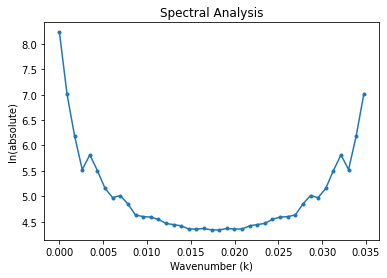

In [ ]:
plt.plot(k, ln_abs, '.-')
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

#Cut-off Regional, Residual, Noise from Spectra

Text(0, 0.5, 'ln(absolute)')

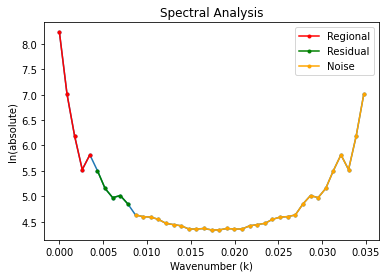

In [ ]:
# mari kita tebak batasnya
reg_cut = 5
res_cut = 10

k_reg_cut = k[:reg_cut]; ln_reg_cut = ln_abs[:reg_cut]
k_res_cut = k[reg_cut:res_cut]; ln_res_cut = ln_abs[reg_cut:res_cut]
k_noise_cut = k[res_cut:]; ln_noise_cut = ln_abs[res_cut:]

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')

plt.legend((p1[0], p2[0], p3[0]), ['Regional', 'Residual', 'Noise'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

#Determine window for Moving Average

#### Regression Function

In [ ]:
def simple_linear_regression_traditional(x, y):
  import numpy as np
  x = np.array(x); y = np.array(y)
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  err_x = x - mean_x
  err_y = y - mean_y
  err_mult = err_x * err_y
  numerator = np.sum(err_mult)
  err_x_squared = err_x**2
  denominator = np.sum(err_x_squared)
  B1 = numerator / denominator
  B0 = mean_y - B1 * mean_x

  return(B0, B1) # B0 intercept, B1 gradient

### Regression, calculate Cutt-off Frequency, calculate Window

In [ ]:
#Regional Zone
B0, B1=simple_linear_regression_traditional(k_reg_cut, ln_reg_cut)

#Residual Zone
B2, B3=simple_linear_regression_traditional(k_res_cut, ln_res_cut)

# cut-off
cut_off = (B2-B0)/(B1-B3)

# window
windows = 2*np.pi/((fourier_data.Interval[3]-fourier_data.Interval[2])*cut_off)

print("Calculated window: ",windows, "\n")
print("Intercept for Regional Zone: ",B0)
print("Gradient for Regional Zone: ",B1)
print("Intercept for Residual Zone: ",B2)
print("Gradient for Residual Zone: ",B3)
print("Cut-off frequency: ",cut_off)

Calculated window:  11.424813290989556 

Intercept for Regional Zone:  7.816037719495384
Gradient for Regional Zone:  -726.81152225673
Intercept for Residual Zone:  6.113761303465819
Gradient for Residual Zone:  -166.99541089252315
Cut-off frequency:  0.0030407778223483337


### Windowing rule

Window must be an **odd number**. Rule and example:

* 1.25 rounded to 1. 1 is odd, so window = 1
* 1.75 rounded to 2. 2 is even, so window = 2 - 1 = 1
* 2.25 rounded to 2. 2 is even, so window = 2 + 1 = 3
* 2.75 rounded to 3. 3 is even, so window = 3

In [ ]:
rounded = np.round(windows)

if rounded % 2 == 0:
  # even
  if (rounded - windows) > 0:
    window = rounded - 1
  if (rounded - windows) < 0:
    window = rounded + 1
else:
  # odd
  window = rounded

print("Selected odd window is:", window)

Selected odd window is: 11.0


### Plot regression of spectrum

Text(0, 0.5, 'ln(absolute)')

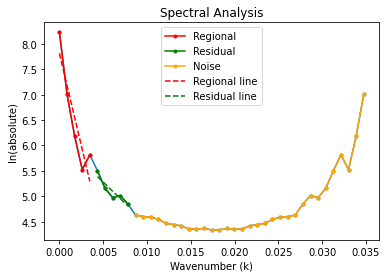

In [ ]:
y_reg = B0 + B1 * k_reg_cut
y_res = B2 + B3 * k_res_cut

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')
p4 = plt.plot(k_reg_cut, y_reg, '--', color='red')
p5 = plt.plot(k_res_cut, y_res, '--', color='green')

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ['Regional', 'Residual', 'Noise', 'Regional line', 'Residual line'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

# Moving Average (Regional Separation)

In [ ]:
regional = fourier_data.CBA.rolling(window=(int(window))).mean()

# Residual Separation

In [ ]:
residual = fourier_data.CBA - regional

# Print DataFrame

In [ ]:
mva = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "Interval": data.Interval, "CBA": data.CBA, "Regional": regional, "Residual": residual})
mva.head(20)

,UTM_X,UTM_Y,Interval,CBA,Regional,Residual
0,585827.022451,9.176950e+06,0.000000,165.660482,NaN,NaN
1,585968.023639,9.177063e+06,180.861475,161.669018,NaN,NaN
2,586109.024827,9.177176e+06,361.722950,155.559255,NaN,NaN
3,586250.026014,9.177290e+06,542.584424,146.441055,NaN,NaN
4,586391.027202,9.177403e+06,723.445899,136.066867,NaN,NaN
5,586532.028390,9.177516e+06,904.307374,128.104311,NaN,NaN
6,586673.029578,9.177629e+06,1085.168849,124.035238,NaN,NaN
7,586814.030765,9.177743e+06,1266.030324,120.329355,NaN,NaN
8,586955.031953,9.177856e+06,1446.891798,120.256108,NaN,NaN
9,587096.033141,9.177969e+06,1627.753273,126.817633,NaN,NaN


# Plot CBA, Regional, Residual Slice

Text(0, 0.5, 'Regional anomaly (mgal)')

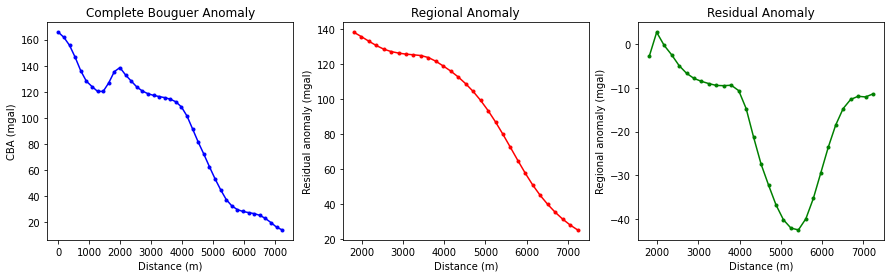

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(mva.Interval, mva.CBA, '.-', color='blue')
plt.title('Complete Bouguer Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('CBA (mgal)')
plt.subplot(1,3,2)
plt.plot(mva.Interval, mva.Regional, '.-', color='red')
plt.title('Regional Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Residual anomaly (mgal)')
plt.subplot(1,3,3)
plt.plot(mva.Interval, mva.Residual, '.-', color='green')
plt.title('Residual Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Regional anomaly (mgal)')

# Save data into CSV

In [ ]:
mva.to_csv('/content/fft_SW-NE.csv') 

# Southeast-Nortwest Slice

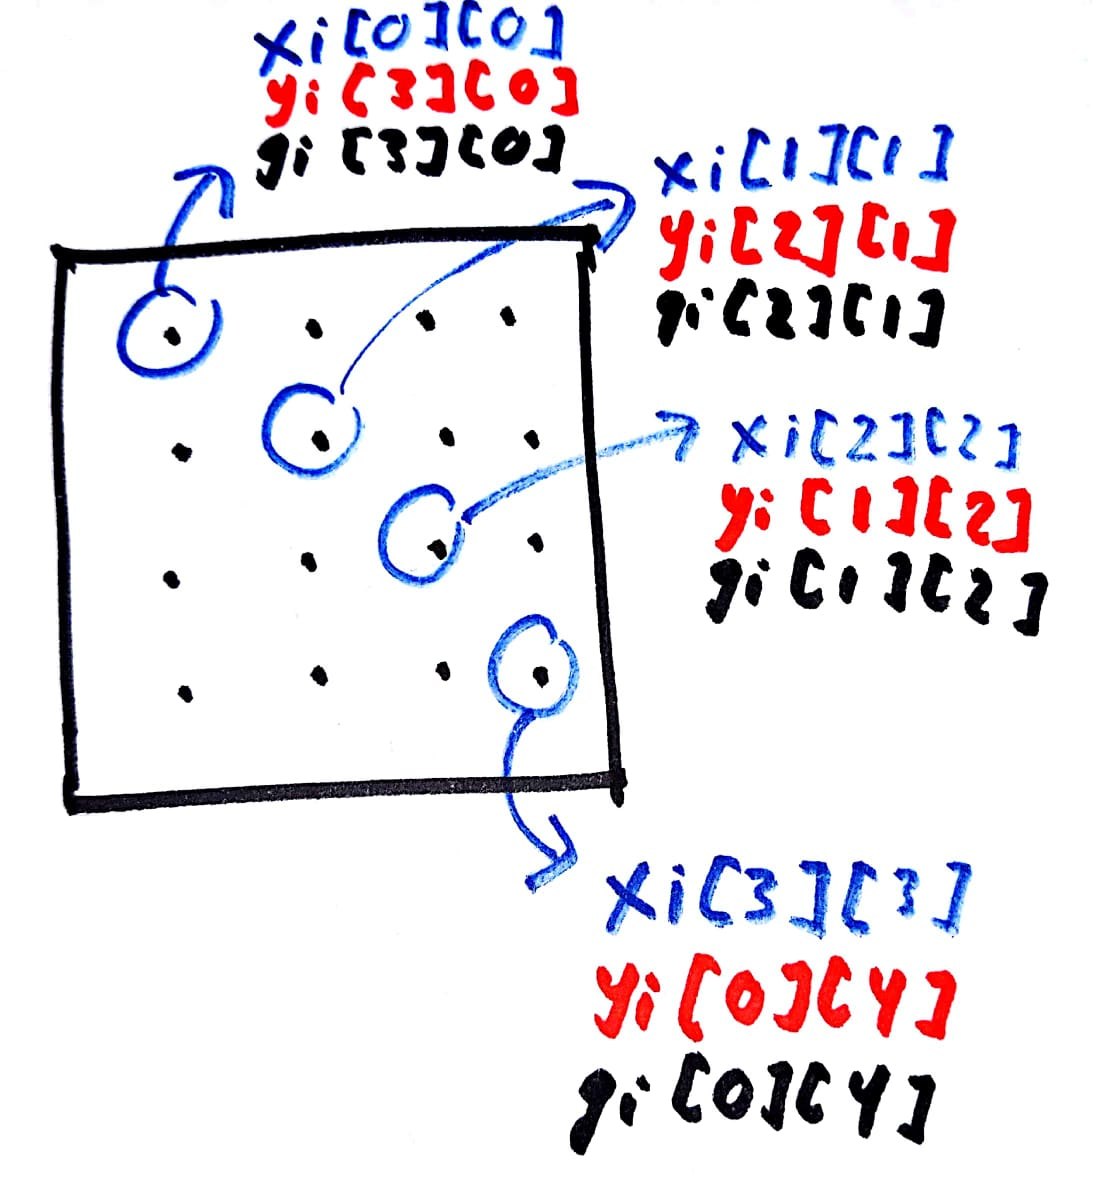

**Clue**

In [ ]:
a = [1,2,3,4,5]
for i, j in zip(reversed(range(len(a))), (range(len(a)))):
  print(a[i], a[j])

5 1
4 2
3 3
2 4
1 5


In [ ]:
# SE-NW slice
x_slice = np.array(xi[0])
print('Coordinate slice in X direction:', x_slice)

y_slice = []
for k, j in zip(reversed(range(len(x_slice))), (range(len(x_slice)))):
  yslice = yi[k][j]
  y_slice.append(float(yslice))
y_slice = np.array(y_slice)
print('Coordinate slice in Y direction:', y_slice)

g_slice = []
for k, j in zip(reversed(range(len(x_slice))), (range(len(x_slice)))):
  gslice = zi[k][j]
  g_slice.append(float(gslice))
g_slice = np.array(g_slice)
print('CBA on slice:', g_slice)

Coordinate slice in X direction: [585263.0177     585404.01888776 585545.02007551 585686.02126327
 585827.02245102 585968.02363878 586109.02482653 586250.02601429
 586391.02720204 586532.0283898  586673.02957755 586814.03076531
 586955.03195306 587096.03314082 587237.03432857 587378.03551633
 587519.03670408 587660.03789184 587801.03907959 587942.04026735
 588083.0414551  588224.04264286 588365.04383061 588506.04501837
 588647.04620612 588788.04739388 588929.04858163 589070.04976939
 589211.05095714 589352.0521449  589493.05333265 589634.05452041
 589775.05570816 589916.05689592 590057.05808367 590198.05927143
 590339.06045918 590480.06164694 590621.06283469 590762.06402245
 590903.0652102  591044.06639796 591185.06758571 591326.06877347
 591467.06996122 591608.07114898 591749.07233673 591890.07352449
 592031.07471224 592172.0759    ]
Coordinate slice in Y direction: [9182046.926      9181933.65844898 9181820.39089796 9181707.12334694
 9181593.85579592 9181480.5882449  9181367.32069388

**Visualize the Slice**

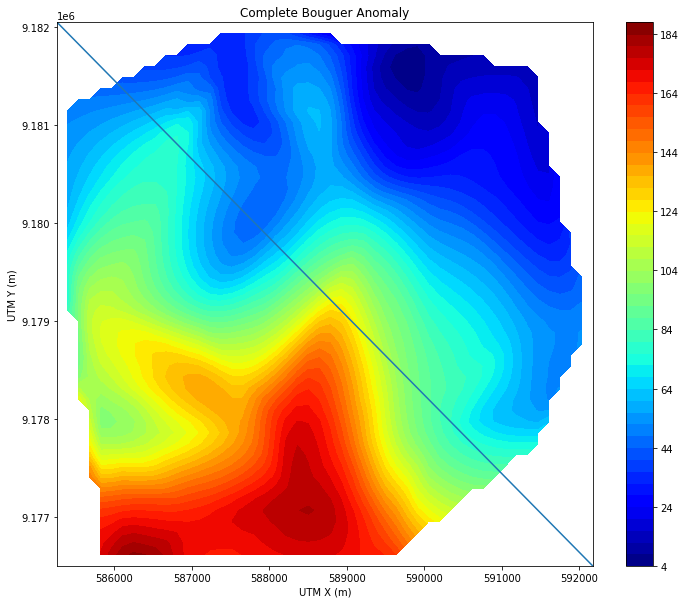

In [ ]:
import scipy
from scipy.interpolate import griddata

xi = np.linspace(min(utm_x), max(utm_x), 50)
yi = np.linspace(min(utm_y), max(utm_y), 50)
xi, yi = np.meshgrid(xi, yi)
# Interpolation
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
# plot CBA contours
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.plot(x_slice, y_slice)

## Data Preparation for FFT

**Create DataFrame**

In [ ]:
data = pd.DataFrame({"UTM_X": x_slice, "UTM_Y": y_slice, "CBA": g_slice})
data.head(10)

,UTM_X,UTM_Y,CBA
0,585263.017700,9.182047e+06,NaN
1,585404.018888,9.181934e+06,NaN
2,585545.020076,9.181820e+06,NaN
3,585686.021263,9.181707e+06,NaN
4,585827.022451,9.181594e+06,NaN
5,585968.023639,9.181481e+06,NaN
6,586109.024827,9.181367e+06,45.623177
7,586250.026014,9.181254e+06,50.793576
8,586391.027202,9.181141e+06,57.207963
9,586532.028390,9.181028e+06,64.907559


**Remove NaN from DataFrame**

In [ ]:
# look up the number of rows with NaN data
print("Original size of data:", len(data), "rows")
print("How many data with NaN values?")
print(data.isnull().sum())

# drop rows with missing values
data.dropna(inplace=True)
# re-index dataframe
data = data.reset_index(drop=True)
print("NaN has successfully been deleted")
data.head(10)

Original size of data: 50 rows
How many data with NaN values?
UTM_X     0
UTM_Y     0
CBA      15
dtype: int64
NaN has successfully been deleted


,UTM_X,UTM_Y,CBA
0,586109.024827,9.181367e+06,45.623177
1,586250.026014,9.181254e+06,50.793576
2,586391.027202,9.181141e+06,57.207963
3,586532.028390,9.181028e+06,64.907559
4,586673.029578,9.180914e+06,74.165751
5,586814.030765,9.180801e+06,76.666321
6,586955.031953,9.180688e+06,70.787933
7,587096.033141,9.180574e+06,65.545514
8,587237.034329,9.180461e+06,61.812356
9,587378.035516,9.180348e+06,56.774061


**Calculate Interval on Slice**

In [ ]:
# calculate distance on slice from the first point on slice
dist_x = np.array([j-i for i, j in zip(data.UTM_X[:-1], data.UTM_X[1:])])
dist_y = np.array([j-i for i, j in zip(data.UTM_Y[:-1], data.UTM_Y[1:])])
dist = np.sqrt((dist_x**2) + (dist_y**2))
dist = np.cumsum(dist)
dist = np.append(0, dist)

**Put interval into dataframe**

In [ ]:
data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": dist})
data.head(10)

,UTM_X,UTM_Y,CBA,Interval
0,586109.024827,9.181367e+06,45.623177,0.000000
1,586250.026014,9.181254e+06,50.793576,180.861475
2,586391.027202,9.181141e+06,57.207963,361.722950
3,586532.028390,9.181028e+06,64.907559,542.584424
4,586673.029578,9.180914e+06,74.165751,723.445899
5,586814.030765,9.180801e+06,76.666321,904.307374
6,586955.031953,9.180688e+06,70.787933,1085.168849
7,587096.033141,9.180574e+06,65.545514,1266.030324
8,587237.034329,9.180461e+06,61.812356,1446.891798
9,587378.035516,9.180348e+06,56.774061,1627.753273


## Fourier Transform

In [ ]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

fourier = np.fft.fft(data.CBA)
print(len(fourier))

35


In [ ]:
imaginary = fourier.imag
real = fourier.real
absolute = np.sqrt((imaginary**2) + (real**2))
ln_abs = np.log(absolute)

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute
0,586109.024827,9.181367e+06,45.623177,0.000000,2800.855038+0.000000j,2800.855038,0.000000,2800.855038,7.937680
1,586250.026014,9.181254e+06,50.793576,180.861475,-239.722411+417.857673j,-239.722411,417.857673,481.738383,6.177401
2,586391.027202,9.181141e+06,57.207963,361.722950,49.262318-255.609323j,49.262318,-255.609323,260.313085,5.561885
3,586532.028390,9.181028e+06,64.907559,542.584424,-117.448662+119.027381j,-117.448662,119.027381,167.217540,5.119296
4,586673.029578,9.180914e+06,74.165751,723.445899,-27.286221+34.104692j,-27.286221,34.104692,43.676858,3.776818
5,586814.030765,9.180801e+06,76.666321,904.307374,-12.587849+66.827760j,-12.587849,66.827760,68.002966,4.219551
6,586955.031953,9.180688e+06,70.787933,1085.168849,-36.330242+49.912496j,-36.330242,49.912496,61.734462,4.122842
7,587096.033141,9.180574e+06,65.545514,1266.030324,1.523116+45.354880j,1.523116,45.354880,45.380447,3.815081
8,587237.034329,9.180461e+06,61.812356,1446.891798,-22.108719+20.161030j,-22.108719,20.161030,29.920939,3.398559
9,587378.035516,9.180348e+06,56.774061,1627.753273,-16.408100+15.612262j,-16.408100,15.612262,22.648807,3.120107


**Compute sampling frequency**

In [ ]:
# compute freq sampling
interval_last = fourier_data.Interval.iloc[-1]
minus = interval_last - fourier_data.Interval.iloc[0]

f_s = 0 # initial freq sampling
f_sample = []
for i in range(0,len(fourier_data.CBA)-1):
  f_s = f_s + (1 / minus)
  f_sample.append(float(f_s))
f_sample = np.append(0, f_sample)

# put into dataframe
fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute,FreqSample
0,586109.024827,9.181367e+06,45.623177,0.000000,2800.855038+0.000000j,2800.855038,0.000000,2800.855038,7.937680,0.000000
1,586250.026014,9.181254e+06,50.793576,180.861475,-239.722411+417.857673j,-239.722411,417.857673,481.738383,6.177401,0.000163
2,586391.027202,9.181141e+06,57.207963,361.722950,49.262318-255.609323j,49.262318,-255.609323,260.313085,5.561885,0.000325
3,586532.028390,9.181028e+06,64.907559,542.584424,-117.448662+119.027381j,-117.448662,119.027381,167.217540,5.119296,0.000488
4,586673.029578,9.180914e+06,74.165751,723.445899,-27.286221+34.104692j,-27.286221,34.104692,43.676858,3.776818,0.000650
5,586814.030765,9.180801e+06,76.666321,904.307374,-12.587849+66.827760j,-12.587849,66.827760,68.002966,4.219551,0.000813
6,586955.031953,9.180688e+06,70.787933,1085.168849,-36.330242+49.912496j,-36.330242,49.912496,61.734462,4.122842,0.000976
7,587096.033141,9.180574e+06,65.545514,1266.030324,1.523116+45.354880j,1.523116,45.354880,45.380447,3.815081,0.001138
8,587237.034329,9.180461e+06,61.812356,1446.891798,-22.108719+20.161030j,-22.108719,20.161030,29.920939,3.398559,0.001301
9,587378.035516,9.180348e+06,56.774061,1627.753273,-16.408100+15.612262j,-16.408100,15.612262,22.648807,3.120107,0.001464


**Wavenumber**

In [ ]:
k = 2 * np.pi * f_sample

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample, "Wavenumber": k})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute,FreqSample,Wavenumber
0,586109.024827,9.181367e+06,45.623177,0.000000,2800.855038+0.000000j,2800.855038,0.000000,2800.855038,7.937680,0.000000,0.000000
1,586250.026014,9.181254e+06,50.793576,180.861475,-239.722411+417.857673j,-239.722411,417.857673,481.738383,6.177401,0.000163,0.001022
2,586391.027202,9.181141e+06,57.207963,361.722950,49.262318-255.609323j,49.262318,-255.609323,260.313085,5.561885,0.000325,0.002044
3,586532.028390,9.181028e+06,64.907559,542.584424,-117.448662+119.027381j,-117.448662,119.027381,167.217540,5.119296,0.000488,0.003065
4,586673.029578,9.180914e+06,74.165751,723.445899,-27.286221+34.104692j,-27.286221,34.104692,43.676858,3.776818,0.000650,0.004087
5,586814.030765,9.180801e+06,76.666321,904.307374,-12.587849+66.827760j,-12.587849,66.827760,68.002966,4.219551,0.000813,0.005109
6,586955.031953,9.180688e+06,70.787933,1085.168849,-36.330242+49.912496j,-36.330242,49.912496,61.734462,4.122842,0.000976,0.006131
7,587096.033141,9.180574e+06,65.545514,1266.030324,1.523116+45.354880j,1.523116,45.354880,45.380447,3.815081,0.001138,0.007152
8,587237.034329,9.180461e+06,61.812356,1446.891798,-22.108719+20.161030j,-22.108719,20.161030,29.920939,3.398559,0.001301,0.008174
9,587378.035516,9.180348e+06,56.774061,1627.753273,-16.408100+15.612262j,-16.408100,15.612262,22.648807,3.120107,0.001464,0.009196


**Plot Spectrum**

Text(0, 0.5, 'ln(absolute)')

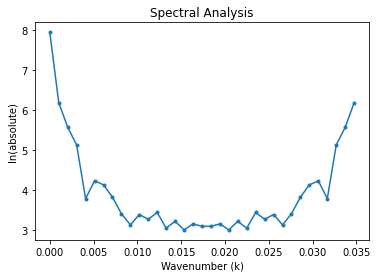

In [ ]:
plt.plot(k, ln_abs, '.-')
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Cut-off Regional, Residual, Noise from Spectra

Text(0, 0.5, 'ln(absolute)')

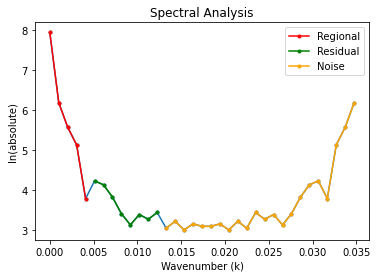

In [ ]:
# guess the cutoff!
reg_cut = 5
res_cut = 13

k_reg_cut = k[:reg_cut]; ln_reg_cut = ln_abs[:reg_cut]
k_res_cut = k[reg_cut:res_cut]; ln_res_cut = ln_abs[reg_cut:res_cut]
k_noise_cut = k[res_cut:]; ln_noise_cut = ln_abs[res_cut:]

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')

plt.legend((p1[0], p2[0], p3[0]), ['Regional', 'Residual', 'Noise'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Determine window for Moving Average

### Regression Function

In [ ]:
def simple_linear_regression_traditional(x, y):
  import numpy as np
  x = np.array(x); y = np.array(y)
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  err_x = x - mean_x
  err_y = y - mean_y
  err_mult = err_x * err_y
  numerator = np.sum(err_mult)
  err_x_squared = err_x**2
  denominator = np.sum(err_x_squared)
  B1 = numerator / denominator
  B0 = mean_y - B1 * mean_x

  return(B0, B1) # B0 intercept, B1 gradient

### Regression, calculate Cutt-off Frequency, calculate Window

In [ ]:
#Regional Zone
B0, B1=simple_linear_regression_traditional(k_reg_cut, ln_reg_cut)

#Residual Zone
B2, B3=simple_linear_regression_traditional(k_res_cut, ln_res_cut)

# cut-off
cut_off = (B2-B0)/(B1-B3)

# window
windows = 2*np.pi/((fourier_data.Interval[3]-fourier_data.Interval[2])*cut_off)

print("Calculated window: ",windows, "\n")
print("Intercept for Regional Zone: ",B0)
print("Gradient for Regional Zone: ",B1)
print("Intercept for Residual Zone: ",B2)
print("Gradient for Residual Zone: ",B3)
print("Cut-off frequency: ",cut_off)

Calculated window:  9.597138217842206 

Intercept for Regional Zone:  7.590581828001847
Gradient for Regional Zone:  -917.9943984299285
Intercept for Residual Zone:  4.74952225302157
Gradient for Residual Zone:  -133.14145794257968
Cut-off frequency:  0.0036198623059450364


### Windowing rule

Window must be an **odd number**. Rule and example:

* 1.25 rounded to 1. 1 is odd, so window = 1
* 1.75 rounded to 2. 2 is even, so window = 2 - 1 = 1
* 2.25 rounded to 2. 2 is even, so window = 2 + 1 = 3
* 2.75 rounded to 3. 3 is even, so window = 3

In [ ]:
rounded = np.round(windows)

if rounded % 2 == 0:
  # even
  if (rounded - windows) > 0:
    window = rounded - 1
  if (rounded - windows) < 0:
    window = rounded + 1
else:
  # odd
  window = rounded

print("Selected odd window is:", window)

Selected odd window is: 9.0


### Plot Regression of Spectrum

Text(0, 0.5, 'ln(absolute)')

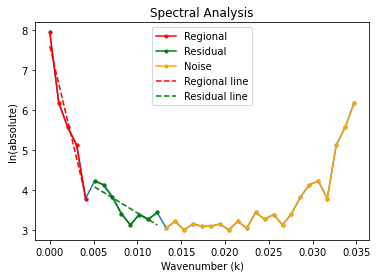

In [ ]:
y_reg = B0 + B1 * k_reg_cut
y_res = B2 + B3 * k_res_cut

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')
p4 = plt.plot(k_reg_cut, y_reg, '--', color='red')
p5 = plt.plot(k_res_cut, y_res, '--', color='green')

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ['Regional', 'Residual', 'Noise', 'Regional line', 'Residual line'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Moving Average (Regional Separation)

In [ ]:
regional = fourier_data.CBA.rolling(window=(int(window))).mean()

## Residual Separation

In [ ]:
residual = fourier_data.CBA - regional

## Print DataFrame

In [ ]:
mva = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "Interval": data.Interval, "CBA": data.CBA, "Regional": regional, "Residual": residual})
mva.head(20)

,UTM_X,UTM_Y,Interval,CBA,Regional,Residual
0,586109.024827,9.181367e+06,0.000000,45.623177,NaN,NaN
1,586250.026014,9.181254e+06,180.861475,50.793576,NaN,NaN
2,586391.027202,9.181141e+06,361.722950,57.207963,NaN,NaN
3,586532.028390,9.181028e+06,542.584424,64.907559,NaN,NaN
4,586673.029578,9.180914e+06,723.445899,74.165751,NaN,NaN
5,586814.030765,9.180801e+06,904.307374,76.666321,NaN,NaN
6,586955.031953,9.180688e+06,1085.168849,70.787933,NaN,NaN
7,587096.033141,9.180574e+06,1266.030324,65.545514,NaN,NaN
8,587237.034329,9.180461e+06,1446.891798,61.812356,63.056683,-1.244327
9,587378.035516,9.180348e+06,1627.753273,56.774061,64.295670,-7.521610


## Plot CBA, Regional, Residual Slice

Text(0, 0.5, 'Regional anomaly (mgal)')

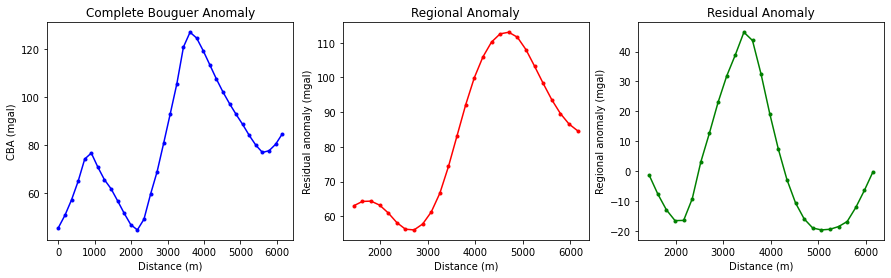

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(mva.Interval, mva.CBA, '.-', color='blue')
plt.title('Complete Bouguer Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('CBA (mgal)')
plt.subplot(1,3,2)
plt.plot(mva.Interval, mva.Regional, '.-', color='red')
plt.title('Regional Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Residual anomaly (mgal)')
plt.subplot(1,3,3)
plt.plot(mva.Interval, mva.Residual, '.-', color='green')
plt.title('Residual Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Regional anomaly (mgal)')

## Save data into CSV

In [ ]:
mva.to_csv('/content/fft_SE-NW.csv') 

# East-West Slice 1

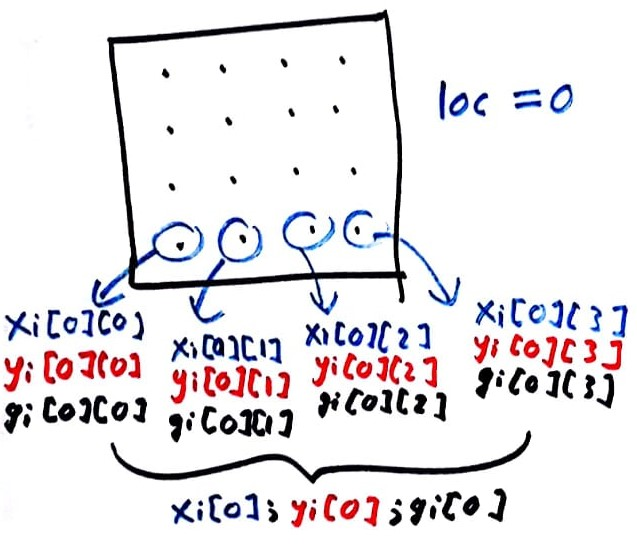

In [ ]:
# E-W slice
x_slice = xi[10]
print('Coordinate slice in X direction:', x_slice)

y_slice = yi[10]
print('Coordinate slice in Y direction:', y_slice)

g_slice = zi[10]
print('CBA on slice:', g_slice)

Coordinate slice in X direction: [585263.0177     585404.01888776 585545.02007551 585686.02126327
 585827.02245102 585968.02363878 586109.02482653 586250.02601429
 586391.02720204 586532.0283898  586673.02957755 586814.03076531
 586955.03195306 587096.03314082 587237.03432857 587378.03551633
 587519.03670408 587660.03789184 587801.03907959 587942.04026735
 588083.0414551  588224.04264286 588365.04383061 588506.04501837
 588647.04620612 588788.04739388 588929.04858163 589070.04976939
 589211.05095714 589352.0521449  589493.05333265 589634.05452041
 589775.05570816 589916.05689592 590057.05808367 590198.05927143
 590339.06045918 590480.06164694 590621.06283469 590762.06402245
 590903.0652102  591044.06639796 591185.06758571 591326.06877347
 591467.06996122 591608.07114898 591749.07233673 591890.07352449
 592031.07471224 592172.0759    ]
Coordinate slice in Y direction: [9177629.4915102 9177629.4915102 9177629.4915102 9177629.4915102
 9177629.4915102 9177629.4915102 9177629.4915102 917762

**Visualize the Slice**

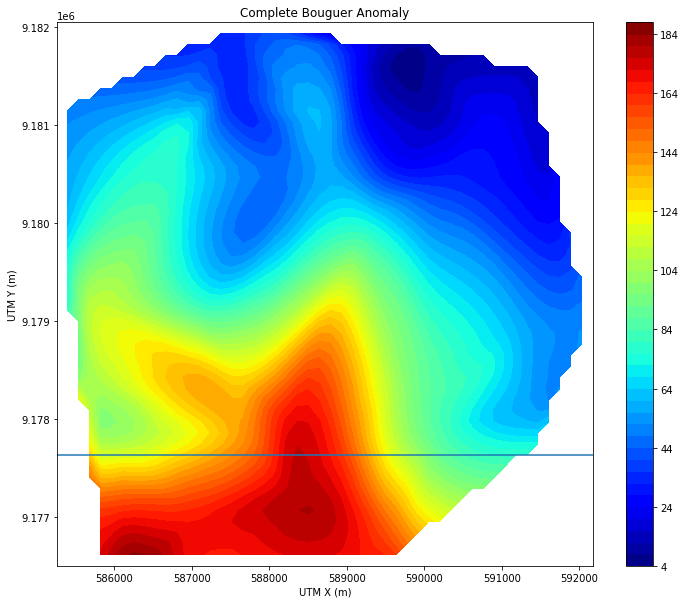

In [ ]:
import scipy
from scipy.interpolate import griddata

xi = np.linspace(min(utm_x), max(utm_x), 50)
yi = np.linspace(min(utm_y), max(utm_y), 50)
xi, yi = np.meshgrid(xi, yi)
# Interpolation
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
# plot CBA contours
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.plot(x_slice, y_slice)

## Data Preparation for FFT

**Create DataFrame**

In [ ]:
data = pd.DataFrame({"UTM_X": x_slice, "UTM_Y": y_slice, "CBA": g_slice})
data.head(10)

,UTM_X,UTM_Y,CBA
0,585263.017700,9.177629e+06,NaN
1,585404.018888,9.177629e+06,NaN
2,585545.020076,9.177629e+06,NaN
3,585686.021263,9.177629e+06,129.628850
4,585827.022451,9.177629e+06,115.417454
5,585968.023639,9.177629e+06,116.045208
6,586109.024827,9.177629e+06,116.614899
7,586250.026014,9.177629e+06,117.015731
8,586391.027202,9.177629e+06,117.787088
9,586532.028390,9.177629e+06,120.817927


**Remove NaN from DataFrame**

In [ ]:
# look up the number of rows with NaN data
print("Original size of data:", len(data), "rows")
print("How many data with NaN values?")
print(data.isnull().sum())

# drop rows with missing values
data.dropna(inplace=True)
# re-index dataframe
data = data.reset_index(drop=True)
print("NaN has successfully been deleted")
data.head(10)

Original size of data: 50 rows
How many data with NaN values?
UTM_X    0
UTM_Y    0
CBA      9
dtype: int64
NaN has successfully been deleted


,UTM_X,UTM_Y,CBA
0,585686.021263,9.177629e+06,129.628850
1,585827.022451,9.177629e+06,115.417454
2,585968.023639,9.177629e+06,116.045208
3,586109.024827,9.177629e+06,116.614899
4,586250.026014,9.177629e+06,117.015731
5,586391.027202,9.177629e+06,117.787088
6,586532.028390,9.177629e+06,120.817927
7,586673.029578,9.177629e+06,124.035238
8,586814.030765,9.177629e+06,126.970287
9,586955.031953,9.177629e+06,129.949820


**Calculate Interval on Slice**

In [ ]:
# calculate distance on slice from the first point on slice
dist_x = np.array([j-i for i, j in zip(data.UTM_X[:-1], data.UTM_X[1:])])
dist_y = np.array([j-i for i, j in zip(data.UTM_Y[:-1], data.UTM_Y[1:])])
dist = np.sqrt((dist_x**2) + (dist_y**2))
dist = np.cumsum(dist)
dist = np.append(0, dist)

**Put Interval into DataFrame**

In [ ]:
data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": dist})
data.head(10)

,UTM_X,UTM_Y,CBA,Interval
0,585686.021263,9.177629e+06,129.628850,0.000000
1,585827.022451,9.177629e+06,115.417454,141.001188
2,585968.023639,9.177629e+06,116.045208,282.002376
3,586109.024827,9.177629e+06,116.614899,423.003563
4,586250.026014,9.177629e+06,117.015731,564.004751
5,586391.027202,9.177629e+06,117.787088,705.005939
6,586532.028390,9.177629e+06,120.817927,846.007127
7,586673.029578,9.177629e+06,124.035238,987.008314
8,586814.030765,9.177629e+06,126.970287,1128.009502
9,586955.031953,9.177629e+06,129.949820,1269.010690


## Fourier Transform

In [ ]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

fourier = np.fft.fft(data.CBA)
print(len(fourier))

41


In [ ]:
imaginary = fourier.imag
real = fourier.real
absolute = np.sqrt((imaginary**2) + (real**2))
ln_abs = np.log(absolute)

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute
0,585686.021263,9.177629e+06,129.628850,0.000000,5134.416480+0.000000j,5134.416480,0.000000,5134.416480,8.543721
1,585827.022451,9.177629e+06,115.417454,141.001188,-703.415990-404.524346j,-703.415990,-404.524346,811.439462,6.698810
2,585968.023639,9.177629e+06,116.045208,282.002376,241.688347-126.825199j,241.688347,-126.825199,272.943013,5.609263
3,586109.024827,9.177629e+06,116.614899,423.003563,-28.221361-64.314038j,-28.221361,-64.314038,70.233473,4.251825
4,586250.026014,9.177629e+06,117.015731,564.004751,68.058199-46.881139j,68.058199,-46.881139,82.642359,4.414522
5,586391.027202,9.177629e+06,117.787088,705.005939,30.126727-56.656137j,30.126727,-56.656137,64.168041,4.161505
6,586532.028390,9.177629e+06,120.817927,846.007127,27.247139-28.871575j,27.247139,-28.871575,39.698545,3.681315
7,586673.029578,9.177629e+06,124.035238,987.008314,41.014339-41.867459j,41.014339,-41.867459,58.609386,4.070895
8,586814.030765,9.177629e+06,126.970287,1128.009502,24.981155-18.612329j,24.981155,-18.612329,31.152478,3.438894
9,586955.031953,9.177629e+06,129.949820,1269.010690,33.666267-21.484007j,33.666267,-21.484007,39.937202,3.687308


**Compute Sampling Frequency**

In [ ]:
# compute freq sampling
interval_last = fourier_data.Interval.iloc[-1]
minus = interval_last - fourier_data.Interval.iloc[0]

f_s = 0 # initial freq sampling
f_sample = []
for i in range(0,len(fourier_data.CBA)-1):
  f_s = f_s + (1 / minus)
  f_sample.append(float(f_s))
f_sample = np.append(0, f_sample)

# put into dataframe
fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute,FreqSample
0,585686.021263,9.177629e+06,129.628850,0.000000,5134.416480+0.000000j,5134.416480,0.000000,5134.416480,8.543721,0.000000
1,585827.022451,9.177629e+06,115.417454,141.001188,-703.415990-404.524346j,-703.415990,-404.524346,811.439462,6.698810,0.000177
2,585968.023639,9.177629e+06,116.045208,282.002376,241.688347-126.825199j,241.688347,-126.825199,272.943013,5.609263,0.000355
3,586109.024827,9.177629e+06,116.614899,423.003563,-28.221361-64.314038j,-28.221361,-64.314038,70.233473,4.251825,0.000532
4,586250.026014,9.177629e+06,117.015731,564.004751,68.058199-46.881139j,68.058199,-46.881139,82.642359,4.414522,0.000709
5,586391.027202,9.177629e+06,117.787088,705.005939,30.126727-56.656137j,30.126727,-56.656137,64.168041,4.161505,0.000887
6,586532.028390,9.177629e+06,120.817927,846.007127,27.247139-28.871575j,27.247139,-28.871575,39.698545,3.681315,0.001064
7,586673.029578,9.177629e+06,124.035238,987.008314,41.014339-41.867459j,41.014339,-41.867459,58.609386,4.070895,0.001241
8,586814.030765,9.177629e+06,126.970287,1128.009502,24.981155-18.612329j,24.981155,-18.612329,31.152478,3.438894,0.001418
9,586955.031953,9.177629e+06,129.949820,1269.010690,33.666267-21.484007j,33.666267,-21.484007,39.937202,3.687308,0.001596


**Wavenumber**

In [ ]:
k = 2 * np.pi * f_sample

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample, "Wavenumber": k})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute,FreqSample,Wavenumber
0,585686.021263,9.177629e+06,129.628850,0.000000,5134.416480+0.000000j,5134.416480,0.000000,5134.416480,8.543721,0.000000,0.000000
1,585827.022451,9.177629e+06,115.417454,141.001188,-703.415990-404.524346j,-703.415990,-404.524346,811.439462,6.698810,0.000177,0.001114
2,585968.023639,9.177629e+06,116.045208,282.002376,241.688347-126.825199j,241.688347,-126.825199,272.943013,5.609263,0.000355,0.002228
3,586109.024827,9.177629e+06,116.614899,423.003563,-28.221361-64.314038j,-28.221361,-64.314038,70.233473,4.251825,0.000532,0.003342
4,586250.026014,9.177629e+06,117.015731,564.004751,68.058199-46.881139j,68.058199,-46.881139,82.642359,4.414522,0.000709,0.004456
5,586391.027202,9.177629e+06,117.787088,705.005939,30.126727-56.656137j,30.126727,-56.656137,64.168041,4.161505,0.000887,0.005570
6,586532.028390,9.177629e+06,120.817927,846.007127,27.247139-28.871575j,27.247139,-28.871575,39.698545,3.681315,0.001064,0.006684
7,586673.029578,9.177629e+06,124.035238,987.008314,41.014339-41.867459j,41.014339,-41.867459,58.609386,4.070895,0.001241,0.007798
8,586814.030765,9.177629e+06,126.970287,1128.009502,24.981155-18.612329j,24.981155,-18.612329,31.152478,3.438894,0.001418,0.008912
9,586955.031953,9.177629e+06,129.949820,1269.010690,33.666267-21.484007j,33.666267,-21.484007,39.937202,3.687308,0.001596,0.010026


**Plot Spectrum**

Text(0, 0.5, 'ln(absolute)')

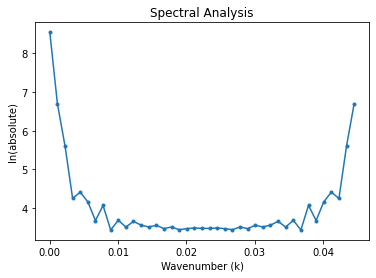

In [ ]:
plt.plot(k, ln_abs, '.-')
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Cut-off Regional, Residual, Noise from Spectra

Text(0, 0.5, 'ln(absolute)')

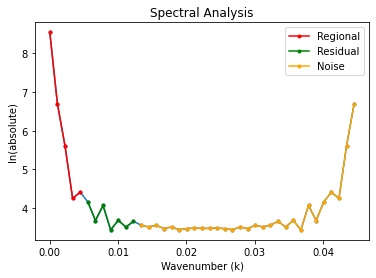

In [ ]:
# guess the cutoff !
reg_cut = 5
res_cut = 12

k_reg_cut = k[:reg_cut]; ln_reg_cut = ln_abs[:reg_cut]
k_res_cut = k[reg_cut:res_cut]; ln_res_cut = ln_abs[reg_cut:res_cut]
k_noise_cut = k[res_cut:]; ln_noise_cut = ln_abs[res_cut:]

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')

plt.legend((p1[0], p2[0], p3[0]), ['Regional', 'Residual', 'Noise'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Determine window for Moving Average

### Regression Function

In [ ]:
def simple_linear_regression_traditional(x, y):
  import numpy as np
  x = np.array(x); y = np.array(y)
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  err_x = x - mean_x
  err_y = y - mean_y
  err_mult = err_x * err_y
  numerator = np.sum(err_mult)
  err_x_squared = err_x**2
  denominator = np.sum(err_x_squared)
  B1 = numerator / denominator
  B0 = mean_y - B1 * mean_x

  return(B0, B1) # B0 intercept, B1 gradient

### Regression, Calculate Cutt-off Frequency, Calculate Window

In [ ]:
#Regional Zone
B0, B1=simple_linear_regression_traditional(k_reg_cut, ln_reg_cut)

#Residual Zone
B2, B3=simple_linear_regression_traditional(k_res_cut, ln_res_cut)

# cut-off
cut_off = (B2-B0)/(B1-B3)

# window
windows = 2*np.pi/((fourier_data.Interval[3]-fourier_data.Interval[2])*cut_off)

print("Calculated window: ",windows, "\n")
print("Intercept for Regional Zone: ",B0)
print("Gradient for Regional Zone: ",B1)
print("Intercept for Residual Zone: ",B2)
print("Gradient for Residual Zone: ",B3)
print("Cut-off frequency: ",cut_off)

Calculated window:  10.818871891860384 

Intercept for Regional Zone:  8.044704933051989
Gradient for Regional Zone:  -960.9595401681553
Intercept for Residual Zone:  4.380517797260338
Gradient for Residual Zone:  -71.34366020297747
Cut-off frequency:  0.0041188418713198754


### Windowing rule

Window must be an **odd number**. Rule and example:

* 1.25 rounded to 1. 1 is odd, so window = 1
* 1.75 rounded to 2. 2 is even, so window = 2 - 1 = 1
* 2.25 rounded to 2. 2 is even, so window = 2 + 1 = 3
* 2.75 rounded to 3. 3 is even, so window = 3

In [ ]:
rounded = np.round(windows)

if rounded % 2 == 0:
  # even
  if (rounded - windows) > 0:
    window = rounded - 1
  if (rounded - windows) < 0:
    window = rounded + 1
else:
  # odd
  window = rounded

print("Selected odd window is:", window)

Selected odd window is: 11.0


### Plot Regression of Spectrum

Text(0, 0.5, 'ln(absolute)')

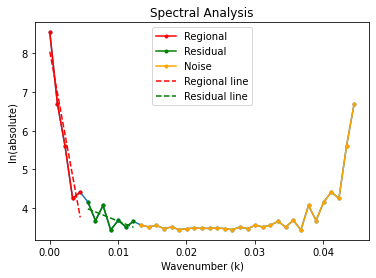

In [ ]:
y_reg = B0 + B1 * k_reg_cut
y_res = B2 + B3 * k_res_cut

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')
p4 = plt.plot(k_reg_cut, y_reg, '--', color='red')
p5 = plt.plot(k_res_cut, y_res, '--', color='green')

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ['Regional', 'Residual', 'Noise', 'Regional line', 'Residual line'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Moving Average (Regional Separation)

In [ ]:
regional = fourier_data.CBA.rolling(window=(int(window))).mean()

## Residual Separation

In [ ]:
residual = fourier_data.CBA - regional

## Print DataFrame

In [ ]:
mva = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "Interval": data.Interval, "CBA": data.CBA, "Regional": regional, "Residual": residual})
mva.head(20)

,UTM_X,UTM_Y,Interval,CBA,Regional,Residual
0,585686.021263,9.177629e+06,0.000000,129.628850,NaN,NaN
1,585827.022451,9.177629e+06,141.001188,115.417454,NaN,NaN
2,585968.023639,9.177629e+06,282.002376,116.045208,NaN,NaN
3,586109.024827,9.177629e+06,423.003563,116.614899,NaN,NaN
4,586250.026014,9.177629e+06,564.004751,117.015731,NaN,NaN
5,586391.027202,9.177629e+06,705.005939,117.787088,NaN,NaN
6,586532.028390,9.177629e+06,846.007127,120.817927,NaN,NaN
7,586673.029578,9.177629e+06,987.008314,124.035238,NaN,NaN
8,586814.030765,9.177629e+06,1128.009502,126.970287,NaN,NaN
9,586955.031953,9.177629e+06,1269.010690,129.949820,NaN,NaN


## Plot CBA, Regional, Residual Slice

Text(0, 0.5, 'Regional anomaly (mgal)')

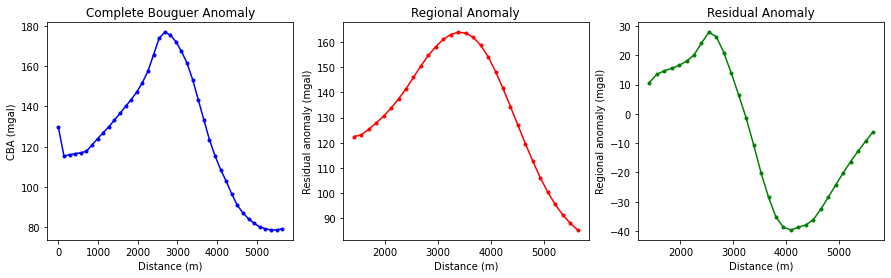

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(mva.Interval, mva.CBA, '.-', color='blue')
plt.title('Complete Bouguer Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('CBA (mgal)')
plt.subplot(1,3,2)
plt.plot(mva.Interval, mva.Regional, '.-', color='red')
plt.title('Regional Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Residual anomaly (mgal)')
plt.subplot(1,3,3)
plt.plot(mva.Interval, mva.Residual, '.-', color='green')
plt.title('Residual Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Regional anomaly (mgal)')

## Save Data into CSV

In [ ]:
mva.to_csv('/content/fft_E-W_1.csv') 

# East-West Slice 2

In [ ]:
# E-W slice
x_slice = xi[25]
print('Coordinate slice in X direction:', x_slice)

y_slice = yi[25]
print('Coordinate slice in Y direction:', y_slice)

g_slice = zi[25]
print('CBA on slice:', g_slice)

Coordinate slice in X direction: [585263.0177     585404.01888776 585545.02007551 585686.02126327
 585827.02245102 585968.02363878 586109.02482653 586250.02601429
 586391.02720204 586532.0283898  586673.02957755 586814.03076531
 586955.03195306 587096.03314082 587237.03432857 587378.03551633
 587519.03670408 587660.03789184 587801.03907959 587942.04026735
 588083.0414551  588224.04264286 588365.04383061 588506.04501837
 588647.04620612 588788.04739388 588929.04858163 589070.04976939
 589211.05095714 589352.0521449  589493.05333265 589634.05452041
 589775.05570816 589916.05689592 590057.05808367 590198.05927143
 590339.06045918 590480.06164694 590621.06283469 590762.06402245
 590903.0652102  591044.06639796 591185.06758571 591326.06877347
 591467.06996122 591608.07114898 591749.07233673 591890.07352449
 592031.07471224 592172.0759    ]
Coordinate slice in Y direction: [9179328.50477551 9179328.50477551 9179328.50477551 9179328.50477551
 9179328.50477551 9179328.50477551 9179328.50477551

**Visualize the Slice**

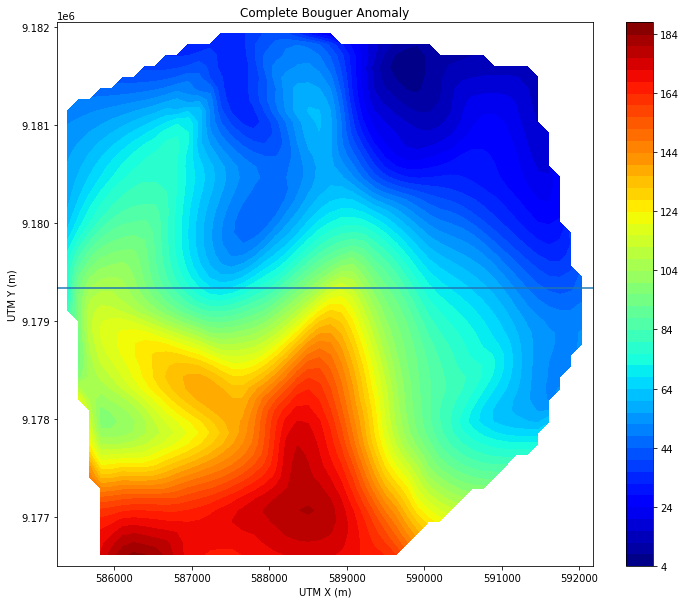

In [ ]:
import scipy
from scipy.interpolate import griddata

xi = np.linspace(min(utm_x), max(utm_x), 50)
yi = np.linspace(min(utm_y), max(utm_y), 50)
xi, yi = np.meshgrid(xi, yi)
# Interpolation
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
# plot CBA contours
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.plot(x_slice, y_slice)

## Data Preparation for FFT

**Create DataFrame**

In [ ]:
data = pd.DataFrame({"UTM_X": x_slice, "UTM_Y": y_slice, "CBA": g_slice})
data.head(10)

,UTM_X,UTM_Y,CBA
0,585263.017700,9.179329e+06,NaN
1,585404.018888,9.179329e+06,78.034601
2,585545.020076,9.179329e+06,95.358684
3,585686.021263,9.179329e+06,104.045398
4,585827.022451,9.179329e+06,106.911595
5,585968.023639,9.179329e+06,107.457959
6,586109.024827,9.179329e+06,105.329620
7,586250.026014,9.179329e+06,101.545273
8,586391.027202,9.179329e+06,97.010167
9,586532.028390,9.179329e+06,92.024806


**Remove NaN from DataFrame**

In [ ]:
# look up the number of rows with NaN data
print("Original size of data:", len(data), "rows")
print("How many data with NaN values?")
print(data.isnull().sum())

# drop rows with missing values
data.dropna(inplace=True)
# re-index dataframe
data = data.reset_index(drop=True)
print("NaN has successfully been deleted")
data.head(10)

Original size of data: 50 rows
How many data with NaN values?
UTM_X    0
UTM_Y    0
CBA      2
dtype: int64
NaN has successfully been deleted


,UTM_X,UTM_Y,CBA
0,585404.018888,9.179329e+06,78.034601
1,585545.020076,9.179329e+06,95.358684
2,585686.021263,9.179329e+06,104.045398
3,585827.022451,9.179329e+06,106.911595
4,585968.023639,9.179329e+06,107.457959
5,586109.024827,9.179329e+06,105.329620
6,586250.026014,9.179329e+06,101.545273
7,586391.027202,9.179329e+06,97.010167
8,586532.028390,9.179329e+06,92.024806
9,586673.029578,9.179329e+06,86.854675


**Calculate Interval on Slice**

In [ ]:
# calculate distance on slice from the first point on slice
dist_x = np.array([j-i for i, j in zip(data.UTM_X[:-1], data.UTM_X[1:])])
dist_y = np.array([j-i for i, j in zip(data.UTM_Y[:-1], data.UTM_Y[1:])])
dist = np.sqrt((dist_x**2) + (dist_y**2))
dist = np.cumsum(dist)
dist = np.append(0, dist)

**Put Interval into DataFrame**

In [ ]:
data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": dist})
data.head(10)

,UTM_X,UTM_Y,CBA,Interval
0,585404.018888,9.179329e+06,78.034601,0.000000
1,585545.020076,9.179329e+06,95.358684,141.001188
2,585686.021263,9.179329e+06,104.045398,282.002376
3,585827.022451,9.179329e+06,106.911595,423.003563
4,585968.023639,9.179329e+06,107.457959,564.004751
5,586109.024827,9.179329e+06,105.329620,705.005939
6,586250.026014,9.179329e+06,101.545273,846.007127
7,586391.027202,9.179329e+06,97.010167,987.008314
8,586532.028390,9.179329e+06,92.024806,1128.009502
9,586673.029578,9.179329e+06,86.854675,1269.010690


## Fourier Transform

In [ ]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

fourier = np.fft.fft(data.CBA)
print(len(fourier))

48


In [ ]:
imaginary = fourier.imag
real = fourier.real
absolute = np.sqrt((imaginary**2) + (real**2))
ln_abs = np.log(absolute)

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute
0,585404.018888,9.179329e+06,78.034601,0.000000,3827.667157+0.000000j,3827.667157,0.000000,3827.667157,8.250011
1,585545.020076,9.179329e+06,95.358684,141.001188,-290.189345-241.963740j,-290.189345,-241.963740,377.831057,5.934447
2,585686.021263,9.179329e+06,104.045398,282.002376,272.998895-428.620354j,272.998895,-428.620354,508.176942,6.230830
3,585827.022451,9.179329e+06,106.911595,423.003563,-147.456021-202.946551j,-147.456021,-202.946551,250.859684,5.524894
4,585968.023639,9.179329e+06,107.457959,564.004751,18.141860-143.482132j,18.141860,-143.482132,144.624512,4.974141
5,586109.024827,9.179329e+06,105.329620,705.005939,-14.384414-59.799109j,-14.384414,-59.799109,61.504836,4.119116
6,586250.026014,9.179329e+06,101.545273,846.007127,14.804162-72.809083j,14.804162,-72.809083,74.298895,4.308096
7,586391.027202,9.179329e+06,97.010167,987.008314,-20.030219-33.671998j,-20.030219,-33.671998,39.179244,3.668147
8,586532.028390,9.179329e+06,92.024806,1128.009502,9.143772-42.591156j,9.143772,-42.591156,43.561625,3.774177
9,586673.029578,9.179329e+06,86.854675,1269.010690,3.247777-19.288479j,3.247777,-19.288479,19.559997,2.973487


**Compute Sampling Frequency**

In [ ]:
# compute freq sampling
interval_last = fourier_data.Interval.iloc[-1]
minus = interval_last - fourier_data.Interval.iloc[0]

f_s = 0 # initial freq sampling
f_sample = []
for i in range(0,len(fourier_data.CBA)-1):
  f_s = f_s + (1 / minus)
  f_sample.append(float(f_s))
f_sample = np.append(0, f_sample)

# put into dataframe
fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute,FreqSample
0,585404.018888,9.179329e+06,78.034601,0.000000,3827.667157+0.000000j,3827.667157,0.000000,3827.667157,8.250011,0.000000
1,585545.020076,9.179329e+06,95.358684,141.001188,-290.189345-241.963740j,-290.189345,-241.963740,377.831057,5.934447,0.000151
2,585686.021263,9.179329e+06,104.045398,282.002376,272.998895-428.620354j,272.998895,-428.620354,508.176942,6.230830,0.000302
3,585827.022451,9.179329e+06,106.911595,423.003563,-147.456021-202.946551j,-147.456021,-202.946551,250.859684,5.524894,0.000453
4,585968.023639,9.179329e+06,107.457959,564.004751,18.141860-143.482132j,18.141860,-143.482132,144.624512,4.974141,0.000604
5,586109.024827,9.179329e+06,105.329620,705.005939,-14.384414-59.799109j,-14.384414,-59.799109,61.504836,4.119116,0.000754
6,586250.026014,9.179329e+06,101.545273,846.007127,14.804162-72.809083j,14.804162,-72.809083,74.298895,4.308096,0.000905
7,586391.027202,9.179329e+06,97.010167,987.008314,-20.030219-33.671998j,-20.030219,-33.671998,39.179244,3.668147,0.001056
8,586532.028390,9.179329e+06,92.024806,1128.009502,9.143772-42.591156j,9.143772,-42.591156,43.561625,3.774177,0.001207
9,586673.029578,9.179329e+06,86.854675,1269.010690,3.247777-19.288479j,3.247777,-19.288479,19.559997,2.973487,0.001358


**Wavenumber**

In [ ]:
k = 2 * np.pi * f_sample

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample, "Wavenumber": k})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute,FreqSample,Wavenumber
0,585404.018888,9.179329e+06,78.034601,0.000000,3827.667157+0.000000j,3827.667157,0.000000,3827.667157,8.250011,0.000000,0.000000
1,585545.020076,9.179329e+06,95.358684,141.001188,-290.189345-241.963740j,-290.189345,-241.963740,377.831057,5.934447,0.000151,0.000948
2,585686.021263,9.179329e+06,104.045398,282.002376,272.998895-428.620354j,272.998895,-428.620354,508.176942,6.230830,0.000302,0.001896
3,585827.022451,9.179329e+06,106.911595,423.003563,-147.456021-202.946551j,-147.456021,-202.946551,250.859684,5.524894,0.000453,0.002844
4,585968.023639,9.179329e+06,107.457959,564.004751,18.141860-143.482132j,18.141860,-143.482132,144.624512,4.974141,0.000604,0.003792
5,586109.024827,9.179329e+06,105.329620,705.005939,-14.384414-59.799109j,-14.384414,-59.799109,61.504836,4.119116,0.000754,0.004741
6,586250.026014,9.179329e+06,101.545273,846.007127,14.804162-72.809083j,14.804162,-72.809083,74.298895,4.308096,0.000905,0.005689
7,586391.027202,9.179329e+06,97.010167,987.008314,-20.030219-33.671998j,-20.030219,-33.671998,39.179244,3.668147,0.001056,0.006637
8,586532.028390,9.179329e+06,92.024806,1128.009502,9.143772-42.591156j,9.143772,-42.591156,43.561625,3.774177,0.001207,0.007585
9,586673.029578,9.179329e+06,86.854675,1269.010690,3.247777-19.288479j,3.247777,-19.288479,19.559997,2.973487,0.001358,0.008533


**Plot Spectrum**

Text(0, 0.5, 'ln(absolute)')

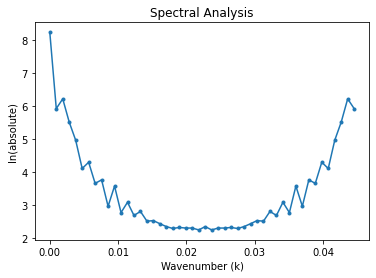

In [ ]:
plt.plot(k, ln_abs, '.-')
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Cut-off Regional, Residual, Noise from Spectra

Text(0, 0.5, 'ln(absolute)')

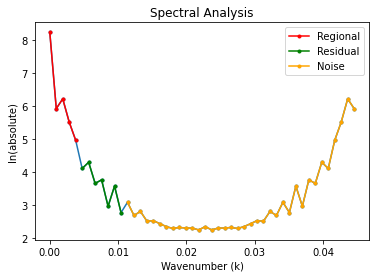

In [ ]:
# guess the cutoff !
reg_cut = 5
res_cut = 12

k_reg_cut = k[:reg_cut]; ln_reg_cut = ln_abs[:reg_cut]
k_res_cut = k[reg_cut:res_cut]; ln_res_cut = ln_abs[reg_cut:res_cut]
k_noise_cut = k[res_cut:]; ln_noise_cut = ln_abs[res_cut:]

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')

plt.legend((p1[0], p2[0], p3[0]), ['Regional', 'Residual', 'Noise'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Determine window for Moving Average

### Regression Function

In [ ]:
def simple_linear_regression_traditional(x, y):
  import numpy as np
  x = np.array(x); y = np.array(y)
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  err_x = x - mean_x
  err_y = y - mean_y
  err_mult = err_x * err_y
  numerator = np.sum(err_mult)
  err_x_squared = err_x**2
  denominator = np.sum(err_x_squared)
  B1 = numerator / denominator
  B0 = mean_y - B1 * mean_x

  return(B0, B1) # B0 intercept, B1 gradient

### Regression, Calculate Cutt-off Frequency, Calculate Window

In [ ]:
#Regional Zone
B0, B1=simple_linear_regression_traditional(k_reg_cut, ln_reg_cut)

#Residual Zone
B2, B3=simple_linear_regression_traditional(k_res_cut, ln_res_cut)

# cut-off
cut_off = (B2-B0)/(B1-B3)

# window
windows = 2*np.pi/((fourier_data.Interval[3]-fourier_data.Interval[2])*cut_off)

print("Calculated window: ",windows, "\n")
print("Intercept for Regional Zone: ",B0)
print("Gradient for Regional Zone: ",B1)
print("Intercept for Residual Zone: ",B2)
print("Gradient for Residual Zone: ",B3)
print("Cut-off frequency: ",cut_off)

Calculated window:  10.103971093413714 

Intercept for Regional Zone:  7.575123119904272
Gradient for Regional Zone:  -734.2275867439768
Intercept for Residual Zone:  5.358548846476857
Gradient for Residual Zone:  -231.63360246383687
Cut-off frequency:  0.004410268214018102


### Windowing rule

Window must be an **odd number**. Rule and example:

* 1.25 rounded to 1. 1 is odd, so window = 1
* 1.75 rounded to 2. 2 is even, so window = 2 - 1 = 1
* 2.25 rounded to 2. 2 is even, so window = 2 + 1 = 3
* 2.75 rounded to 3. 3 is even, so window = 3

In [ ]:
rounded = np.round(windows)

if rounded % 2 == 0:
  # even
  if (rounded - windows) > 0:
    window = rounded - 1
  if (rounded - windows) < 0:
    window = rounded + 1
else:
  # odd
  window = rounded

print("Selected odd window is:", window)

Selected odd window is: 11.0


### Plot Regression of Spectrum

Text(0, 0.5, 'ln(absolute)')

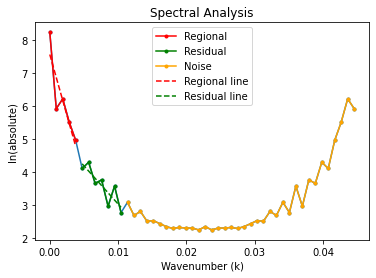

In [ ]:
y_reg = B0 + B1 * k_reg_cut
y_res = B2 + B3 * k_res_cut

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')
p4 = plt.plot(k_reg_cut, y_reg, '--', color='red')
p5 = plt.plot(k_res_cut, y_res, '--', color='green')

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ['Regional', 'Residual', 'Noise', 'Regional line', 'Residual line'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Moving Average (Regional Separation)

In [ ]:
regional = fourier_data.CBA.rolling(window=(int(window))).mean()

## Residual Separation

In [ ]:
residual = fourier_data.CBA - regional

## Print DataFrame

In [ ]:
mva = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "Interval": data.Interval, "CBA": data.CBA, "Regional": regional, "Residual": residual})
mva.head(20)

,UTM_X,UTM_Y,Interval,CBA,Regional,Residual
0,585404.018888,9.179329e+06,0.000000,78.034601,NaN,NaN
1,585545.020076,9.179329e+06,141.001188,95.358684,NaN,NaN
2,585686.021263,9.179329e+06,282.002376,104.045398,NaN,NaN
3,585827.022451,9.179329e+06,423.003563,106.911595,NaN,NaN
4,585968.023639,9.179329e+06,564.004751,107.457959,NaN,NaN
5,586109.024827,9.179329e+06,705.005939,105.329620,NaN,NaN
6,586250.026014,9.179329e+06,846.007127,101.545273,NaN,NaN
7,586391.027202,9.179329e+06,987.008314,97.010167,NaN,NaN
8,586532.028390,9.179329e+06,1128.009502,92.024806,NaN,NaN
9,586673.029578,9.179329e+06,1269.010690,86.854675,NaN,NaN


## Plot CBA, Regional, Residual Slice

Text(0, 0.5, 'Regional anomaly (mgal)')

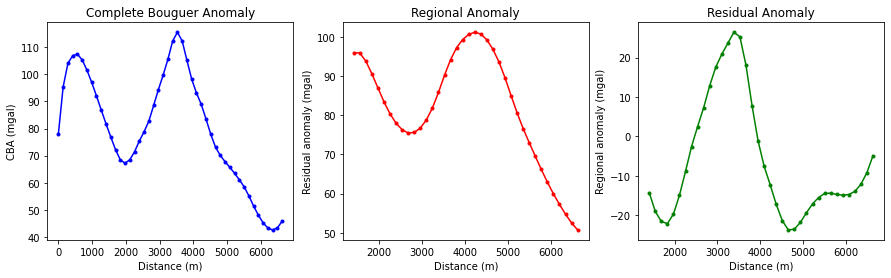

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(mva.Interval, mva.CBA, '.-', color='blue')
plt.title('Complete Bouguer Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('CBA (mgal)')
plt.subplot(1,3,2)
plt.plot(mva.Interval, mva.Regional, '.-', color='red')
plt.title('Regional Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Residual anomaly (mgal)')
plt.subplot(1,3,3)
plt.plot(mva.Interval, mva.Residual, '.-', color='green')
plt.title('Residual Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Regional anomaly (mgal)')

## Save Data into CSV

In [ ]:
mva.to_csv('/content/fft_E-W_2.csv') 

# East-West Slice 3

In [ ]:
# E-W slice
x_slice = xi[40]
print('Coordinate slice in X direction:', x_slice)

y_slice = yi[40]
print('Coordinate slice in Y direction:', y_slice)

g_slice = zi[40]
print('CBA on slice:', g_slice)

Coordinate slice in X direction: [585263.0177     585404.01888776 585545.02007551 585686.02126327
 585827.02245102 585968.02363878 586109.02482653 586250.02601429
 586391.02720204 586532.0283898  586673.02957755 586814.03076531
 586955.03195306 587096.03314082 587237.03432857 587378.03551633
 587519.03670408 587660.03789184 587801.03907959 587942.04026735
 588083.0414551  588224.04264286 588365.04383061 588506.04501837
 588647.04620612 588788.04739388 588929.04858163 589070.04976939
 589211.05095714 589352.0521449  589493.05333265 589634.05452041
 589775.05570816 589916.05689592 590057.05808367 590198.05927143
 590339.06045918 590480.06164694 590621.06283469 590762.06402245
 590903.0652102  591044.06639796 591185.06758571 591326.06877347
 591467.06996122 591608.07114898 591749.07233673 591890.07352449
 592031.07471224 592172.0759    ]
Coordinate slice in Y direction: [9181027.51804082 9181027.51804082 9181027.51804082 9181027.51804082
 9181027.51804082 9181027.51804082 9181027.51804082

**Visualize the Slice**

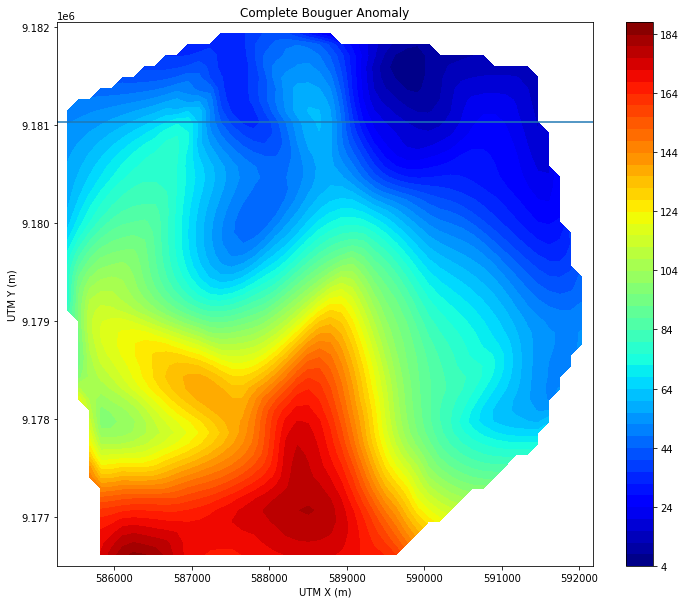

In [ ]:
import scipy
from scipy.interpolate import griddata

xi = np.linspace(min(utm_x), max(utm_x), 50)
yi = np.linspace(min(utm_y), max(utm_y), 50)
xi, yi = np.meshgrid(xi, yi)
# Interpolation
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
# plot CBA contours
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.plot(x_slice, y_slice)

## Data Preparation for FFT

**Create DataFrame**

In [ ]:
data = pd.DataFrame({"UTM_X": x_slice, "UTM_Y": y_slice, "CBA": g_slice})
data.head(10)

,UTM_X,UTM_Y,CBA
0,585263.017700,9.181028e+06,NaN
1,585404.018888,9.181028e+06,51.677184
2,585545.020076,9.181028e+06,52.711787
3,585686.021263,9.181028e+06,53.904903
4,585827.022451,9.181028e+06,55.270083
5,585968.023639,9.181028e+06,56.815899
6,586109.024827,9.181028e+06,58.550798
7,586250.026014,9.181028e+06,60.458671
8,586391.027202,9.181028e+06,62.534478
9,586532.028390,9.181028e+06,64.907559


**Remove NaN from DataFrame**

In [ ]:
# look up the number of rows with NaN data
print("Original size of data:", len(data), "rows")
print("How many data with NaN values?")
print(data.isnull().sum())

# drop rows with missing values
data.dropna(inplace=True)
# re-index dataframe
data = data.reset_index(drop=True)
print("NaN has successfully been deleted")
data.head(10)

Original size of data: 50 rows
How many data with NaN values?
UTM_X    0
UTM_Y    0
CBA      6
dtype: int64
NaN has successfully been deleted


,UTM_X,UTM_Y,CBA
0,585404.018888,9.181028e+06,51.677184
1,585545.020076,9.181028e+06,52.711787
2,585686.021263,9.181028e+06,53.904903
3,585827.022451,9.181028e+06,55.270083
4,585968.023639,9.181028e+06,56.815899
5,586109.024827,9.181028e+06,58.550798
6,586250.026014,9.181028e+06,60.458671
7,586391.027202,9.181028e+06,62.534478
8,586532.028390,9.181028e+06,64.907559
9,586673.029578,9.181028e+06,67.620656


**Calculate Interval on Slice**

In [ ]:
# calculate distance on slice from the first point on slice
dist_x = np.array([j-i for i, j in zip(data.UTM_X[:-1], data.UTM_X[1:])])
dist_y = np.array([j-i for i, j in zip(data.UTM_Y[:-1], data.UTM_Y[1:])])
dist = np.sqrt((dist_x**2) + (dist_y**2))
dist = np.cumsum(dist)
dist = np.append(0, dist)

**Put Interval into DataFrame**

In [ ]:
data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": dist})
data.head(10)

,UTM_X,UTM_Y,CBA,Interval
0,585404.018888,9.181028e+06,51.677184,0.000000
1,585545.020076,9.181028e+06,52.711787,141.001188
2,585686.021263,9.181028e+06,53.904903,282.002376
3,585827.022451,9.181028e+06,55.270083,423.003563
4,585968.023639,9.181028e+06,56.815899,564.004751
5,586109.024827,9.181028e+06,58.550798,705.005939
6,586250.026014,9.181028e+06,60.458671,846.007127
7,586391.027202,9.181028e+06,62.534478,987.008314
8,586532.028390,9.181028e+06,64.907559,1128.009502
9,586673.029578,9.181028e+06,67.620656,1269.010690


## Fourier Transform

In [ ]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

fourier = np.fft.fft(data.CBA)
print(len(fourier))

44


In [ ]:
imaginary = fourier.imag
real = fourier.real
absolute = np.sqrt((imaginary**2) + (real**2))
ln_abs = np.log(absolute)

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute
0,585404.018888,9.181028e+06,51.677184,0.000000,1774.614892+0.000000j,1774.614892,0.000000,1774.614892,7.481339
1,585545.020076,9.181028e+06,52.711787,141.001188,-27.895751-459.582332j,-27.895751,-459.582332,460.428163,6.132157
2,585686.021263,9.181028e+06,53.904903,282.002376,83.859250-188.638646j,83.859250,-188.638646,206.438641,5.330003
3,585827.022451,9.181028e+06,55.270083,423.003563,-176.838903+67.733713j,-176.838903,67.733713,189.366981,5.243687
4,585968.023639,9.181028e+06,56.815899,564.004751,104.951503-77.791252j,104.951503,-77.791252,130.638037,4.872430
5,586109.024827,9.181028e+06,58.550798,705.005939,-26.504793-74.279312j,-26.504793,-74.279312,78.866471,4.367756
6,586250.026014,9.181028e+06,60.458671,846.007127,7.326828-67.664651j,7.326828,-67.664651,68.060175,4.220392
7,586391.027202,9.181028e+06,62.534478,987.008314,17.090007-9.584102j,17.090007,-9.584102,19.593962,2.975221
8,586532.028390,9.181028e+06,64.907559,1128.009502,24.133943-33.753555j,24.133943,-33.753555,41.493972,3.725548
9,586673.029578,9.181028e+06,67.620656,1269.010690,22.863508-32.881090j,22.863508,-32.881090,40.048796,3.690099


**Compute Sampling Frequency**

In [ ]:
# compute freq sampling
interval_last = fourier_data.Interval.iloc[-1]
minus = interval_last - fourier_data.Interval.iloc[0]

f_s = 0 # initial freq sampling
f_sample = []
for i in range(0,len(fourier_data.CBA)-1):
  f_s = f_s + (1 / minus)
  f_sample.append(float(f_s))
f_sample = np.append(0, f_sample)

# put into dataframe
fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute,FreqSample
0,585404.018888,9.181028e+06,51.677184,0.000000,1774.614892+0.000000j,1774.614892,0.000000,1774.614892,7.481339,0.000000
1,585545.020076,9.181028e+06,52.711787,141.001188,-27.895751-459.582332j,-27.895751,-459.582332,460.428163,6.132157,0.000165
2,585686.021263,9.181028e+06,53.904903,282.002376,83.859250-188.638646j,83.859250,-188.638646,206.438641,5.330003,0.000330
3,585827.022451,9.181028e+06,55.270083,423.003563,-176.838903+67.733713j,-176.838903,67.733713,189.366981,5.243687,0.000495
4,585968.023639,9.181028e+06,56.815899,564.004751,104.951503-77.791252j,104.951503,-77.791252,130.638037,4.872430,0.000660
5,586109.024827,9.181028e+06,58.550798,705.005939,-26.504793-74.279312j,-26.504793,-74.279312,78.866471,4.367756,0.000825
6,586250.026014,9.181028e+06,60.458671,846.007127,7.326828-67.664651j,7.326828,-67.664651,68.060175,4.220392,0.000990
7,586391.027202,9.181028e+06,62.534478,987.008314,17.090007-9.584102j,17.090007,-9.584102,19.593962,2.975221,0.001155
8,586532.028390,9.181028e+06,64.907559,1128.009502,24.133943-33.753555j,24.133943,-33.753555,41.493972,3.725548,0.001319
9,586673.029578,9.181028e+06,67.620656,1269.010690,22.863508-32.881090j,22.863508,-32.881090,40.048796,3.690099,0.001484


**Wavenumber**

In [ ]:
k = 2 * np.pi * f_sample

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample, "Wavenumber": k})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute,FreqSample,Wavenumber
0,585404.018888,9.181028e+06,51.677184,0.000000,1774.614892+0.000000j,1774.614892,0.000000,1774.614892,7.481339,0.000000,0.000000
1,585545.020076,9.181028e+06,52.711787,141.001188,-27.895751-459.582332j,-27.895751,-459.582332,460.428163,6.132157,0.000165,0.001036
2,585686.021263,9.181028e+06,53.904903,282.002376,83.859250-188.638646j,83.859250,-188.638646,206.438641,5.330003,0.000330,0.002073
3,585827.022451,9.181028e+06,55.270083,423.003563,-176.838903+67.733713j,-176.838903,67.733713,189.366981,5.243687,0.000495,0.003109
4,585968.023639,9.181028e+06,56.815899,564.004751,104.951503-77.791252j,104.951503,-77.791252,130.638037,4.872430,0.000660,0.004145
5,586109.024827,9.181028e+06,58.550798,705.005939,-26.504793-74.279312j,-26.504793,-74.279312,78.866471,4.367756,0.000825,0.005182
6,586250.026014,9.181028e+06,60.458671,846.007127,7.326828-67.664651j,7.326828,-67.664651,68.060175,4.220392,0.000990,0.006218
7,586391.027202,9.181028e+06,62.534478,987.008314,17.090007-9.584102j,17.090007,-9.584102,19.593962,2.975221,0.001155,0.007254
8,586532.028390,9.181028e+06,64.907559,1128.009502,24.133943-33.753555j,24.133943,-33.753555,41.493972,3.725548,0.001319,0.008290
9,586673.029578,9.181028e+06,67.620656,1269.010690,22.863508-32.881090j,22.863508,-32.881090,40.048796,3.690099,0.001484,0.009327


**Plot Spectrum**

Text(0, 0.5, 'ln(absolute)')

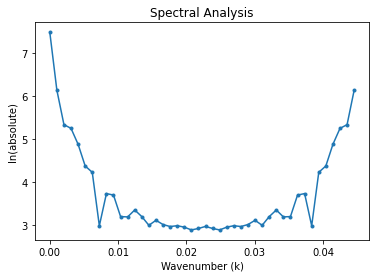

In [ ]:
plt.plot(k, ln_abs, '.-')
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Cut-off Regional, Residual, Noise from Spectra

Text(0, 0.5, 'ln(absolute)')

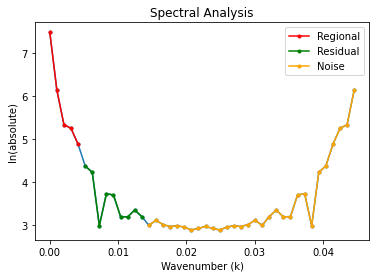

In [ ]:
# guess the cutoff !
reg_cut = 5
res_cut = 14

k_reg_cut = k[:reg_cut]; ln_reg_cut = ln_abs[:reg_cut]
k_res_cut = k[reg_cut:res_cut]; ln_res_cut = ln_abs[reg_cut:res_cut]
k_noise_cut = k[res_cut:]; ln_noise_cut = ln_abs[res_cut:]

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')

plt.legend((p1[0], p2[0], p3[0]), ['Regional', 'Residual', 'Noise'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Determine window for Moving Average

### Regression Function

In [ ]:
def simple_linear_regression_traditional(x, y):
  import numpy as np
  x = np.array(x); y = np.array(y)
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  err_x = x - mean_x
  err_y = y - mean_y
  err_mult = err_x * err_y
  numerator = np.sum(err_mult)
  err_x_squared = err_x**2
  denominator = np.sum(err_x_squared)
  B1 = numerator / denominator
  B0 = mean_y - B1 * mean_x

  return(B0, B1) # B0 intercept, B1 gradien

### Regression, calculate Cutt-off Frequency, calculate Window

In [ ]:
#Regional Zone
B0, B1=simple_linear_regression_traditional(k_reg_cut, ln_reg_cut)

#Residual Zone
B2, B3=simple_linear_regression_traditional(k_res_cut, ln_res_cut)

# cut-off
cut_off = (B2-B0)/(B1-B3)

# window
windows = 2*np.pi/((fourier_data.Interval[3]-fourier_data.Interval[2])*cut_off)

print("Calculated window: ",windows, "\n")
print("Intercept for Regional Zone: ",B0)
print("Gradient for Regional Zone: ",B1)
print("Intercept for Residual Zone: ",B2)
print("Gradient for Residual Zone: ",B3)
print("Cut-off frequency: ",cut_off)

Calculated window:  8.819029286276336 

Intercept for Regional Zone:  7.033180528507515
Gradient for Regional Zone:  -589.2350087669505
Intercept for Residual Zone:  4.662656088490952
Gradient for Residual Zone:  -120.08889327336163
Cut-off frequency:  0.00505284891365355


### Windowing rule

Window must be an **odd number**. Rule and example:

* 1.25 rounded to 1. 1 is odd, so window = 1
* 1.75 rounded to 2. 2 is even, so window = 2 - 1 = 1
* 2.25 rounded to 2. 2 is even, so window = 2 + 1 = 3
* 2.75 rounded to 3. 3 is even, so window = 3

In [ ]:
rounded = np.round(windows)

if rounded % 2 == 0:
  # even
  if (rounded - windows) > 0:
    window = rounded - 1
  if (rounded - windows) < 0:
    window = rounded + 1
else:
  # odd
  window = rounded

print("Selected odd window is:", window)

Selected odd window is: 9.0


### Plot Regression of Spectrum

Text(0, 0.5, 'ln(absolute)')

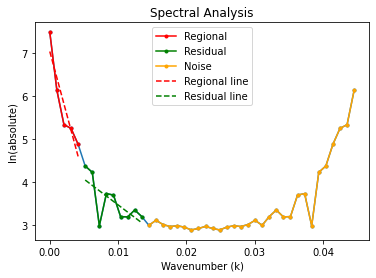

In [ ]:
y_reg = B0 + B1 * k_reg_cut
y_res = B2 + B3 * k_res_cut

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')
p4 = plt.plot(k_reg_cut, y_reg, '--', color='red')
p5 = plt.plot(k_res_cut, y_res, '--', color='green')

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ['Regional', 'Residual', 'Noise', 'Regional line', 'Residual line'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Moving Average (Regional Separation)

In [ ]:
regional = fourier_data.CBA.rolling(window=(int(window))).mean()

## Residual Separation

In [ ]:
residual = fourier_data.CBA - regional

## Print DataFrame

In [ ]:
mva = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "Interval": data.Interval, "CBA": data.CBA, "Regional": regional, "Residual": residual})
mva.head(20)

,UTM_X,UTM_Y,Interval,CBA,Regional,Residual
0,585404.018888,9.181028e+06,0.000000,51.677184,NaN,NaN
1,585545.020076,9.181028e+06,141.001188,52.711787,NaN,NaN
2,585686.021263,9.181028e+06,282.002376,53.904903,NaN,NaN
3,585827.022451,9.181028e+06,423.003563,55.270083,NaN,NaN
4,585968.023639,9.181028e+06,564.004751,56.815899,NaN,NaN
5,586109.024827,9.181028e+06,705.005939,58.550798,NaN,NaN
6,586250.026014,9.181028e+06,846.007127,60.458671,NaN,NaN
7,586391.027202,9.181028e+06,987.008314,62.534478,NaN,NaN
8,586532.028390,9.181028e+06,1128.009502,64.907559,57.425707,7.481851
9,586673.029578,9.181028e+06,1269.010690,67.620656,59.197204,8.423452


## Plot CBA, Regional, Residual Slice

Text(0, 0.5, 'Regional anomaly (mgal)')

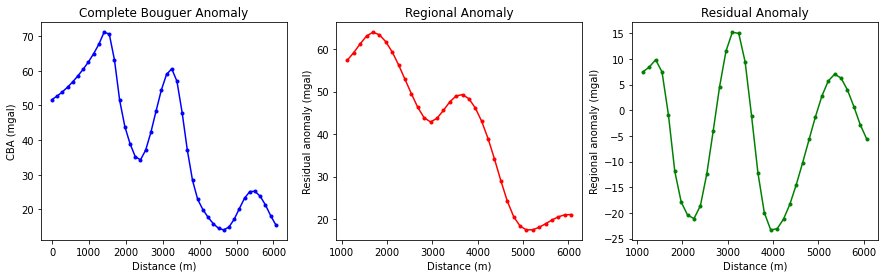

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(mva.Interval, mva.CBA, '.-', color='blue')
plt.title('Complete Bouguer Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('CBA (mgal)')
plt.subplot(1,3,2)
plt.plot(mva.Interval, mva.Regional, '.-', color='red')
plt.title('Regional Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Residual anomaly (mgal)')
plt.subplot(1,3,3)
plt.plot(mva.Interval, mva.Residual, '.-', color='green')
plt.title('Residual Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Regional anomaly (mgal)')

## Save Data into CSV

In [ ]:
mva.to_csv('/content/fft_E-W_3.csv') 

# North-South Slice 1

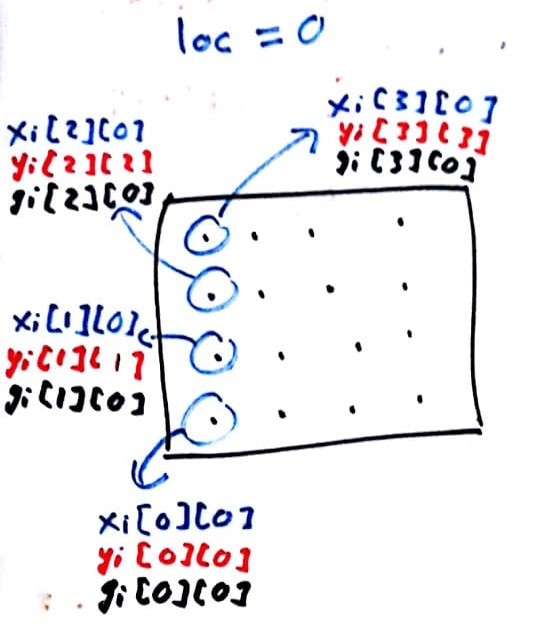

In [ ]:
# N-S slice

loc = 10

x_slice = []
for k in range(len(xi)):
  xslice = xi[k][loc]
  x_slice.append(float(xslice))
x_slice = np.array(x_slice)
print('Coordinate slice in X direction:', x_slice, '\n')

y_slice = []
for k in range(len(xi)):
  yslice = yi[k][k]
  y_slice.append(float(yslice))
y_slice = np.array(y_slice)
print('Coordinate slice in Y direction:', y_slice, '\n')

g_slice = []
for k in range(len(xi)):
  gslice = zi[k][loc]
  g_slice.append(float(gslice))
g_slice = np.array(g_slice)
print('CBA on slice:', g_slice)

Coordinate slice in X direction: [586673.02957755 586673.02957755 586673.02957755 586673.02957755
 586673.02957755 586673.02957755 586673.02957755 586673.02957755
 586673.02957755 586673.02957755 586673.02957755 586673.02957755
 586673.02957755 586673.02957755 586673.02957755 586673.02957755
 586673.02957755 586673.02957755 586673.02957755 586673.02957755
 586673.02957755 586673.02957755 586673.02957755 586673.02957755
 586673.02957755 586673.02957755 586673.02957755 586673.02957755
 586673.02957755 586673.02957755 586673.02957755 586673.02957755
 586673.02957755 586673.02957755 586673.02957755 586673.02957755
 586673.02957755 586673.02957755 586673.02957755 586673.02957755
 586673.02957755 586673.02957755 586673.02957755 586673.02957755
 586673.02957755 586673.02957755 586673.02957755 586673.02957755
 586673.02957755 586673.02957755] 

Coordinate slice in Y direction: [9176496.816      9176610.08355102 9176723.35110204 9176836.61865306
 9176949.88620408 9177063.1537551  9177176.421306

**Visualize the Slice**

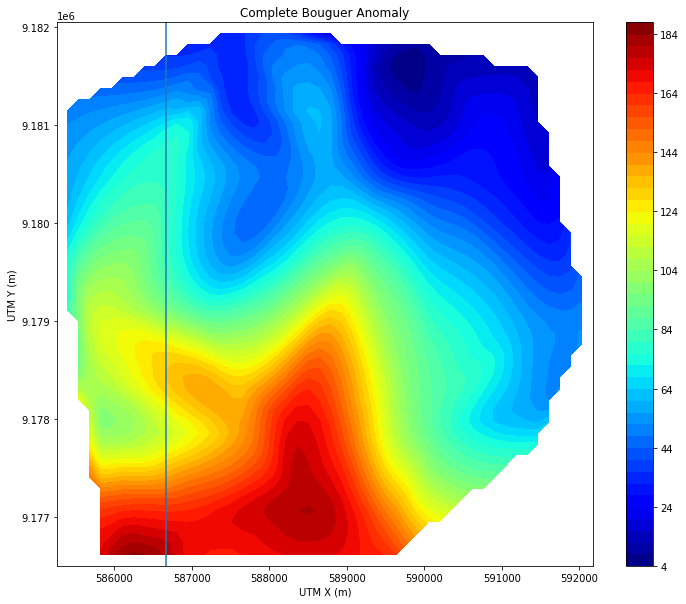

In [ ]:
import scipy
from scipy.interpolate import griddata

xi = np.linspace(min(utm_x), max(utm_x), 50)
yi = np.linspace(min(utm_y), max(utm_y), 50)
xi, yi = np.meshgrid(xi, yi)
# Interpolation
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
# plot CBA contours
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.plot(x_slice, y_slice)

## Data Preparation for FFT

**Create DataFrame**

In [ ]:
data = pd.DataFrame({"UTM_X": x_slice, "UTM_Y": y_slice, "CBA": g_slice})
data.head(10)

,UTM_X,UTM_Y,CBA
0,586673.029578,9.176497e+06,NaN
1,586673.029578,9.176610e+06,178.699140
2,586673.029578,9.176723e+06,177.038093
3,586673.029578,9.176837e+06,172.943126
4,586673.029578,9.176950e+06,168.166070
5,586673.029578,9.177063e+06,163.169438
6,586673.029578,9.177176e+06,156.297036
7,586673.029578,9.177290e+06,147.371611
8,586673.029578,9.177403e+06,139.222038
9,586673.029578,9.177516e+06,131.569690


**Remove NaN from DataFrame**

In [ ]:
# look up the number of rows with NaN data
print("Original size of data:", len(data), "rows")
print("How many data with NaN values?")
print(data.isnull().sum())

# drop rows with missing values
data.dropna(inplace=True)
# re-index dataframe
data = data.reset_index(drop=True)
print("NaN has successfully been deleted")
data.head(10)

Original size of data: 50 rows
How many data with NaN values?
UTM_X    0
UTM_Y    0
CBA      4
dtype: int64
NaN has successfully been deleted


,UTM_X,UTM_Y,CBA
0,586673.029578,9.176610e+06,178.699140
1,586673.029578,9.176723e+06,177.038093
2,586673.029578,9.176837e+06,172.943126
3,586673.029578,9.176950e+06,168.166070
4,586673.029578,9.177063e+06,163.169438
5,586673.029578,9.177176e+06,156.297036
6,586673.029578,9.177290e+06,147.371611
7,586673.029578,9.177403e+06,139.222038
8,586673.029578,9.177516e+06,131.569690
9,586673.029578,9.177629e+06,124.035238


**Calculate Interval on Slice**

In [ ]:
# calculate distance on slice from the first point on slice
dist_x = np.array([j-i for i, j in zip(data.UTM_X[:-1], data.UTM_X[1:])])
dist_y = np.array([j-i for i, j in zip(data.UTM_Y[:-1], data.UTM_Y[1:])])
dist = np.sqrt((dist_x**2) + (dist_y**2))
dist = np.cumsum(dist)
dist = np.append(0, dist)

Put Interval into DataFrame

In [ ]:
data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": dist})
data.head(10)

,UTM_X,UTM_Y,CBA,Interval
0,586673.029578,9.176610e+06,178.699140,0.000000
1,586673.029578,9.176723e+06,177.038093,113.267551
2,586673.029578,9.176837e+06,172.943126,226.535102
3,586673.029578,9.176950e+06,168.166070,339.802653
4,586673.029578,9.177063e+06,163.169438,453.070204
5,586673.029578,9.177176e+06,156.297036,566.337755
6,586673.029578,9.177290e+06,147.371611,679.605306
7,586673.029578,9.177403e+06,139.222038,792.872857
8,586673.029578,9.177516e+06,131.569690,906.140408
9,586673.029578,9.177629e+06,124.035238,1019.407959


## Fourier Transform

In [ ]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

fourier = np.fft.fft(data.CBA)
print(len(fourier))

46


In [ ]:
imaginary = fourier.imag
real = fourier.real
absolute = np.sqrt((imaginary**2) + (real**2))
ln_abs = np.log(absolute)

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute
0,586673.029578,9.176610e+06,178.699140,0.000000,4760.867156+0.000000j,4760.867156,0.000000,4760.867156,8.468185
1,586673.029578,9.176723e+06,177.038093,113.267551,145.402555-835.257480j,145.402555,-835.257480,847.818943,6.742667
2,586673.029578,9.176837e+06,172.943126,226.535102,79.438813-339.869946j,79.438813,-339.869946,349.030236,5.855159
3,586673.029578,9.176950e+06,168.166070,339.802653,157.323614-530.907530j,157.323614,-530.907530,553.726940,6.316672
4,586673.029578,9.177063e+06,163.169438,453.070204,-20.748272-314.994203j,-20.748272,-314.994203,315.676795,5.754719
5,586673.029578,9.177176e+06,156.297036,566.337755,88.327655-195.352323j,88.327655,-195.352323,214.392874,5.367810
6,586673.029578,9.177290e+06,147.371611,679.605306,86.172490-172.148348j,86.172490,-172.148348,192.511692,5.260157
7,586673.029578,9.177403e+06,139.222038,792.872857,79.956949-137.045258j,79.956949,-137.045258,158.664793,5.066794
8,586673.029578,9.177516e+06,131.569690,906.140408,61.717024-126.043567j,61.717024,-126.043567,140.342338,4.944085
9,586673.029578,9.177629e+06,124.035238,1019.407959,69.970612-98.798340j,69.970612,-98.798340,121.066092,4.796337


**Compute Sampling Frequency**

In [ ]:
# compute freq sampling
interval_last = fourier_data.Interval.iloc[-1]
minus = interval_last - fourier_data.Interval.iloc[0]

f_s = 0 # initial freq sampling
f_sample = []
for i in range(0,len(fourier_data.CBA)-1):
  f_s = f_s + (1 / minus)
  f_sample.append(float(f_s))
f_sample = np.append(0, f_sample)

# put into dataframe
fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute,FreqSample
0,586673.029578,9.176610e+06,178.699140,0.000000,4760.867156+0.000000j,4760.867156,0.000000,4760.867156,8.468185,0.000000
1,586673.029578,9.176723e+06,177.038093,113.267551,145.402555-835.257480j,145.402555,-835.257480,847.818943,6.742667,0.000196
2,586673.029578,9.176837e+06,172.943126,226.535102,79.438813-339.869946j,79.438813,-339.869946,349.030236,5.855159,0.000392
3,586673.029578,9.176950e+06,168.166070,339.802653,157.323614-530.907530j,157.323614,-530.907530,553.726940,6.316672,0.000589
4,586673.029578,9.177063e+06,163.169438,453.070204,-20.748272-314.994203j,-20.748272,-314.994203,315.676795,5.754719,0.000785
5,586673.029578,9.177176e+06,156.297036,566.337755,88.327655-195.352323j,88.327655,-195.352323,214.392874,5.367810,0.000981
6,586673.029578,9.177290e+06,147.371611,679.605306,86.172490-172.148348j,86.172490,-172.148348,192.511692,5.260157,0.001177
7,586673.029578,9.177403e+06,139.222038,792.872857,79.956949-137.045258j,79.956949,-137.045258,158.664793,5.066794,0.001373
8,586673.029578,9.177516e+06,131.569690,906.140408,61.717024-126.043567j,61.717024,-126.043567,140.342338,4.944085,0.001570
9,586673.029578,9.177629e+06,124.035238,1019.407959,69.970612-98.798340j,69.970612,-98.798340,121.066092,4.796337,0.001766


**Wavenumber**

In [ ]:
k = 2 * np.pi * f_sample

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample, "Wavenumber": k})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute,FreqSample,Wavenumber
0,586673.029578,9.176610e+06,178.699140,0.000000,4760.867156+0.000000j,4760.867156,0.000000,4760.867156,8.468185,0.000000,0.000000
1,586673.029578,9.176723e+06,177.038093,113.267551,145.402555-835.257480j,145.402555,-835.257480,847.818943,6.742667,0.000196,0.001233
2,586673.029578,9.176837e+06,172.943126,226.535102,79.438813-339.869946j,79.438813,-339.869946,349.030236,5.855159,0.000392,0.002465
3,586673.029578,9.176950e+06,168.166070,339.802653,157.323614-530.907530j,157.323614,-530.907530,553.726940,6.316672,0.000589,0.003698
4,586673.029578,9.177063e+06,163.169438,453.070204,-20.748272-314.994203j,-20.748272,-314.994203,315.676795,5.754719,0.000785,0.004931
5,586673.029578,9.177176e+06,156.297036,566.337755,88.327655-195.352323j,88.327655,-195.352323,214.392874,5.367810,0.000981,0.006164
6,586673.029578,9.177290e+06,147.371611,679.605306,86.172490-172.148348j,86.172490,-172.148348,192.511692,5.260157,0.001177,0.007396
7,586673.029578,9.177403e+06,139.222038,792.872857,79.956949-137.045258j,79.956949,-137.045258,158.664793,5.066794,0.001373,0.008629
8,586673.029578,9.177516e+06,131.569690,906.140408,61.717024-126.043567j,61.717024,-126.043567,140.342338,4.944085,0.001570,0.009862
9,586673.029578,9.177629e+06,124.035238,1019.407959,69.970612-98.798340j,69.970612,-98.798340,121.066092,4.796337,0.001766,0.011094


**Plot Spectrum**

Text(0, 0.5, 'ln(absolute)')

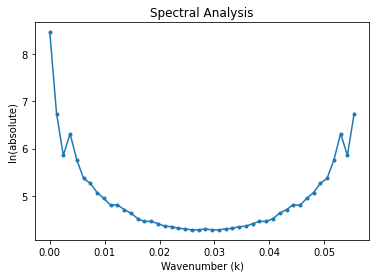

In [ ]:
plt.plot(k, ln_abs, '.-')
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Cut-off Regional, Residual, Noise from Spectra

Text(0, 0.5, 'ln(absolute)')

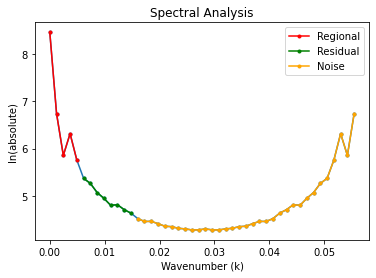

In [ ]:
# guess the cutoff !
reg_cut = 5
res_cut = 13

k_reg_cut = k[:reg_cut]; ln_reg_cut = ln_abs[:reg_cut]
k_res_cut = k[reg_cut:res_cut]; ln_res_cut = ln_abs[reg_cut:res_cut]
k_noise_cut = k[res_cut:]; ln_noise_cut = ln_abs[res_cut:]

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')

plt.legend((p1[0], p2[0], p3[0]), ['Regional', 'Residual', 'Noise'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Determine Window for Moving Average

### Regression Function

In [ ]:
def simple_linear_regression_traditional(x, y):
  import numpy as np
  x = np.array(x); y = np.array(y)
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  err_x = x - mean_x
  err_y = y - mean_y
  err_mult = err_x * err_y
  numerator = np.sum(err_mult)
  err_x_squared = err_x**2
  denominator = np.sum(err_x_squared)
  B1 = numerator / denominator
  B0 = mean_y - B1 * mean_x

  return(B0, B1) # B0 intercept, B1 gradient

### Regression, Calculate Cutt-off Frequency, Calculate Window

In [ ]:
#Regional Zone
B0, B1=simple_linear_regression_traditional(k_reg_cut, ln_reg_cut)

#Residual Zone
B2, B3=simple_linear_regression_traditional(k_res_cut, ln_res_cut)

# cut-off
cut_off = (B2-B0)/(B1-B3)

# window
windows = 2*np.pi/((fourier_data.Interval[3]-fourier_data.Interval[2])*cut_off)

print("Calculated window: ",windows, "\n")
print("Intercept for Regional Zone: ",B0)
print("Gradient for Regional Zone: ",B1)
print("Intercept for Residual Zone: ",B2)
print("Gradient for Residual Zone: ",B3)
print("Cut-off frequency: ",cut_off)

Calculated window:  11.05055118272774 

Intercept for Regional Zone:  7.798065837956287
Gradient for Regional Zone:  -474.80067458100643
Intercept for Residual Zone:  5.8445591648122095
Gradient for Residual Zone:  -85.64400159608178
Cut-off frequency:  0.0050198462695248535


### Windowing rule

Window must be an **odd number**. Rule and example:

* 1.25 rounded to 1. 1 is odd, so window = 1
* 1.75 rounded to 2. 2 is even, so window = 2 - 1 = 1
* 2.25 rounded to 2. 2 is even, so window = 2 + 1 = 3
* 2.75 rounded to 3. 3 is even, so window = 3

In [ ]:
rounded = np.round(windows)

if rounded % 2 == 0:
  # even
  if (rounded - windows) > 0:
    window = rounded - 1
  if (rounded - windows) < 0:
    window = rounded + 1
else:
  # odd
  window = rounded

print("Selected odd window is:", window)

Selected odd window is: 11.0


### Plot Regression of Spectrum

Text(0, 0.5, 'ln(absolute)')

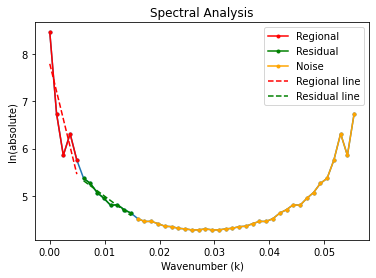

In [ ]:
y_reg = B0 + B1 * k_reg_cut
y_res = B2 + B3 * k_res_cut

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')
p4 = plt.plot(k_reg_cut, y_reg, '--', color='red')
p5 = plt.plot(k_res_cut, y_res, '--', color='green')

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ['Regional', 'Residual', 'Noise', 'Regional line', 'Residual line'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Moving Average (Regional Separation)

In [ ]:
regional = fourier_data.CBA.rolling(window=(int(window))).mean()

## Residual Separation

In [ ]:
residual = fourier_data.CBA - regional

## Print DataFrame

In [ ]:
mva = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "Interval": data.Interval, "CBA": data.CBA, "Regional": regional, "Residual": residual})
mva.head(20)

,UTM_X,UTM_Y,Interval,CBA,Regional,Residual
0,586673.029578,9.176610e+06,0.000000,178.699140,NaN,NaN
1,586673.029578,9.176723e+06,113.267551,177.038093,NaN,NaN
2,586673.029578,9.176837e+06,226.535102,172.943126,NaN,NaN
3,586673.029578,9.176950e+06,339.802653,168.166070,NaN,NaN
4,586673.029578,9.177063e+06,453.070204,163.169438,NaN,NaN
5,586673.029578,9.177176e+06,566.337755,156.297036,NaN,NaN
6,586673.029578,9.177290e+06,679.605306,147.371611,NaN,NaN
7,586673.029578,9.177403e+06,792.872857,139.222038,NaN,NaN
8,586673.029578,9.177516e+06,906.140408,131.569690,NaN,NaN
9,586673.029578,9.177629e+06,1019.407959,124.035238,NaN,NaN


## Plot CBA, Regional, Residual Slice

Text(0, 0.5, 'Regional anomaly (mgal)')

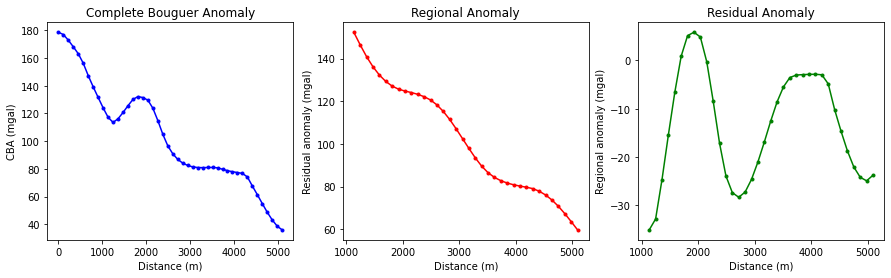

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(mva.Interval, mva.CBA, '.-', color='blue')
plt.title('Complete Bouguer Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('CBA (mgal)')
plt.subplot(1,3,2)
plt.plot(mva.Interval, mva.Regional, '.-', color='red')
plt.title('Regional Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Residual anomaly (mgal)')
plt.subplot(1,3,3)
plt.plot(mva.Interval, mva.Residual, '.-', color='green')
plt.title('Residual Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Regional anomaly (mgal)')

## Save Data into CSV

In [ ]:
mva.to_csv('/content/fft_N-S_1.csv') 

# North-South Slice 2

In [ ]:
# N-S slice

loc = 25

x_slice = []
for k in range(len(xi)):
  xslice = xi[k][loc]
  x_slice.append(float(xslice))
x_slice = np.array(x_slice)
print('Coordinate slice in X direction:', x_slice, '\n')

y_slice = []
for k in range(len(xi)):
  yslice = yi[k][k]
  y_slice.append(float(yslice))
y_slice = np.array(y_slice)
print('Coordinate slice in Y direction:', y_slice, '\n')

g_slice = []
for k in range(len(xi)):
  gslice = zi[k][loc]
  g_slice.append(float(gslice))
g_slice = np.array(g_slice)
print('CBA on slice:', g_slice)

Coordinate slice in X direction: [588788.04739388 588788.04739388 588788.04739388 588788.04739388
 588788.04739388 588788.04739388 588788.04739388 588788.04739388
 588788.04739388 588788.04739388 588788.04739388 588788.04739388
 588788.04739388 588788.04739388 588788.04739388 588788.04739388
 588788.04739388 588788.04739388 588788.04739388 588788.04739388
 588788.04739388 588788.04739388 588788.04739388 588788.04739388
 588788.04739388 588788.04739388 588788.04739388 588788.04739388
 588788.04739388 588788.04739388 588788.04739388 588788.04739388
 588788.04739388 588788.04739388 588788.04739388 588788.04739388
 588788.04739388 588788.04739388 588788.04739388 588788.04739388
 588788.04739388 588788.04739388 588788.04739388 588788.04739388
 588788.04739388 588788.04739388 588788.04739388 588788.04739388
 588788.04739388 588788.04739388] 

Coordinate slice in Y direction: [9176496.816      9176610.08355102 9176723.35110204 9176836.61865306
 9176949.88620408 9177063.1537551  9177176.421306

**Visualize the Slice**

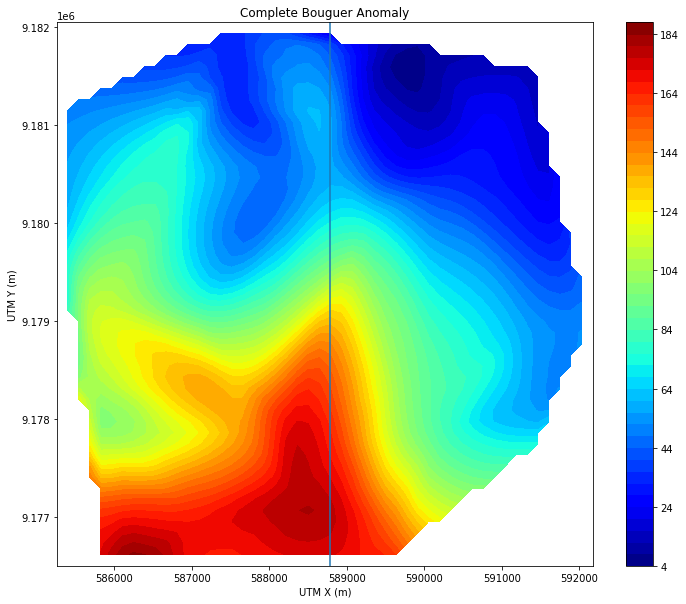

In [ ]:
import scipy
from scipy.interpolate import griddata

xi = np.linspace(min(utm_x), max(utm_x), 50)
yi = np.linspace(min(utm_y), max(utm_y), 50)
xi, yi = np.meshgrid(xi, yi)
# Interpolation
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
# plot CBA contours
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.plot(x_slice, y_slice)

## Data Preparation for FFT

**Create DataFrame**

In [ ]:
data = pd.DataFrame({"UTM_X": x_slice, "UTM_Y": y_slice, "CBA": g_slice})
data.head(10)

,UTM_X,UTM_Y,CBA
0,588788.047394,9.176497e+06,NaN
1,588788.047394,9.176610e+06,172.438851
2,588788.047394,9.176723e+06,174.426719
3,588788.047394,9.176837e+06,176.223515
4,588788.047394,9.176950e+06,177.415022
5,588788.047394,9.177063e+06,177.574613
6,588788.047394,9.177176e+06,176.047902
7,588788.047394,9.177290e+06,173.946103
8,588788.047394,9.177403e+06,171.682069
9,588788.047394,9.177516e+06,169.419467


**Remove NaN from DataFrame**

In [ ]:
# look up the number of rows with NaN data
print("Original size of data:", len(data), "rows")
print("How many data with NaN values?")
print(data.isnull().sum())

# drop rows with missing values
data.dropna(inplace=True)
# re-index dataframe
data = data.reset_index(drop=True)
print("NaN has successfully been deleted")
data.head(10)

Original size of data: 50 rows
How many data with NaN values?
UTM_X    0
UTM_Y    0
CBA      2
dtype: int64
NaN has successfully been deleted


,UTM_X,UTM_Y,CBA
0,588788.047394,9.176610e+06,172.438851
1,588788.047394,9.176723e+06,174.426719
2,588788.047394,9.176837e+06,176.223515
3,588788.047394,9.176950e+06,177.415022
4,588788.047394,9.177063e+06,177.574613
5,588788.047394,9.177176e+06,176.047902
6,588788.047394,9.177290e+06,173.946103
7,588788.047394,9.177403e+06,171.682069
8,588788.047394,9.177516e+06,169.419467
9,588788.047394,9.177629e+06,167.392371


**Calculate Interval on Slice**

In [ ]:
# calculate distance on slice from the first point on slice
dist_x = np.array([j-i for i, j in zip(data.UTM_X[:-1], data.UTM_X[1:])])
dist_y = np.array([j-i for i, j in zip(data.UTM_Y[:-1], data.UTM_Y[1:])])
dist = np.sqrt((dist_x**2) + (dist_y**2))
dist = np.cumsum(dist)
dist = np.append(0, dist)

Put Interval into DataFrame

In [ ]:
data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": dist})
data.head(10)

,UTM_X,UTM_Y,CBA,Interval
0,588788.047394,9.176610e+06,172.438851,0.000000
1,588788.047394,9.176723e+06,174.426719,113.267551
2,588788.047394,9.176837e+06,176.223515,226.535102
3,588788.047394,9.176950e+06,177.415022,339.802653
4,588788.047394,9.177063e+06,177.574613,453.070204
5,588788.047394,9.177176e+06,176.047902,566.337755
6,588788.047394,9.177290e+06,173.946103,679.605306
7,588788.047394,9.177403e+06,171.682069,792.872857
8,588788.047394,9.177516e+06,169.419467,906.140408
9,588788.047394,9.177629e+06,167.392371,1019.407959


## Fourier Transform

In [ ]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

fourier = np.fft.fft(data.CBA)
print(len(fourier))

48


In [ ]:
imaginary = fourier.imag
real = fourier.real
absolute = np.sqrt((imaginary**2) + (real**2))
ln_abs = np.log(absolute)

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute
0,588788.047394,9.176610e+06,172.438851,0.000000,5353.725690+0.000000j,5353.725690,0.000000,5353.725690,8.585548
1,588788.047394,9.176723e+06,174.426719,113.267551,45.066924-1529.319078j,45.066924,-1529.319078,1529.982964,7.333012
2,588788.047394,9.176837e+06,176.223515,226.535102,53.063310-384.950256j,53.063310,-384.950256,388.590291,5.962526
3,588788.047394,9.176950e+06,177.415022,339.802653,-6.624712-409.369049j,-6.624712,-409.369049,409.422648,6.014748
4,588788.047394,9.177063e+06,177.574613,453.070204,25.292908-278.454606j,25.292908,-278.454606,279.600964,5.633363
5,588788.047394,9.177176e+06,176.047902,566.337755,46.943854-234.559914j,46.943854,-234.559914,239.211369,5.477348
6,588788.047394,9.177290e+06,173.946103,679.605306,45.448080-173.640069j,45.448080,-173.640069,179.489279,5.190115
7,588788.047394,9.177403e+06,171.682069,792.872857,51.473286-153.237587j,51.473286,-153.237587,161.651655,5.085444
8,588788.047394,9.177516e+06,169.419467,906.140408,56.173022-127.725319j,56.173022,-127.725319,139.531951,4.938294
9,588788.047394,9.177629e+06,167.392371,1019.407959,59.185709-119.748914j,59.185709,-119.748914,133.576759,4.894676


**Compute Sampling Frequency**

In [ ]:
# compute freq sampling
interval_last = fourier_data.Interval.iloc[-1]
minus = interval_last - fourier_data.Interval.iloc[0]

f_s = 0 # initial freq sampling
f_sample = []
for i in range(0,len(fourier_data.CBA)-1):
  f_s = f_s + (1 / minus)
  f_sample.append(float(f_s))
f_sample = np.append(0, f_sample)

# put into dataframe
fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute,FreqSample
0,588788.047394,9.176610e+06,172.438851,0.000000,5353.725690+0.000000j,5353.725690,0.000000,5353.725690,8.585548,0.000000
1,588788.047394,9.176723e+06,174.426719,113.267551,45.066924-1529.319078j,45.066924,-1529.319078,1529.982964,7.333012,0.000188
2,588788.047394,9.176837e+06,176.223515,226.535102,53.063310-384.950256j,53.063310,-384.950256,388.590291,5.962526,0.000376
3,588788.047394,9.176950e+06,177.415022,339.802653,-6.624712-409.369049j,-6.624712,-409.369049,409.422648,6.014748,0.000564
4,588788.047394,9.177063e+06,177.574613,453.070204,25.292908-278.454606j,25.292908,-278.454606,279.600964,5.633363,0.000751
5,588788.047394,9.177176e+06,176.047902,566.337755,46.943854-234.559914j,46.943854,-234.559914,239.211369,5.477348,0.000939
6,588788.047394,9.177290e+06,173.946103,679.605306,45.448080-173.640069j,45.448080,-173.640069,179.489279,5.190115,0.001127
7,588788.047394,9.177403e+06,171.682069,792.872857,51.473286-153.237587j,51.473286,-153.237587,161.651655,5.085444,0.001315
8,588788.047394,9.177516e+06,169.419467,906.140408,56.173022-127.725319j,56.173022,-127.725319,139.531951,4.938294,0.001503
9,588788.047394,9.177629e+06,167.392371,1019.407959,59.185709-119.748914j,59.185709,-119.748914,133.576759,4.894676,0.001691


**Wavenumber**

In [ ]:
k = 2 * np.pi * f_sample

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample, "Wavenumber": k})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute,FreqSample,Wavenumber
0,588788.047394,9.176610e+06,172.438851,0.000000,5353.725690+0.000000j,5353.725690,0.000000,5353.725690,8.585548,0.000000,0.000000
1,588788.047394,9.176723e+06,174.426719,113.267551,45.066924-1529.319078j,45.066924,-1529.319078,1529.982964,7.333012,0.000188,0.001180
2,588788.047394,9.176837e+06,176.223515,226.535102,53.063310-384.950256j,53.063310,-384.950256,388.590291,5.962526,0.000376,0.002361
3,588788.047394,9.176950e+06,177.415022,339.802653,-6.624712-409.369049j,-6.624712,-409.369049,409.422648,6.014748,0.000564,0.003541
4,588788.047394,9.177063e+06,177.574613,453.070204,25.292908-278.454606j,25.292908,-278.454606,279.600964,5.633363,0.000751,0.004721
5,588788.047394,9.177176e+06,176.047902,566.337755,46.943854-234.559914j,46.943854,-234.559914,239.211369,5.477348,0.000939,0.005901
6,588788.047394,9.177290e+06,173.946103,679.605306,45.448080-173.640069j,45.448080,-173.640069,179.489279,5.190115,0.001127,0.007082
7,588788.047394,9.177403e+06,171.682069,792.872857,51.473286-153.237587j,51.473286,-153.237587,161.651655,5.085444,0.001315,0.008262
8,588788.047394,9.177516e+06,169.419467,906.140408,56.173022-127.725319j,56.173022,-127.725319,139.531951,4.938294,0.001503,0.009442
9,588788.047394,9.177629e+06,167.392371,1019.407959,59.185709-119.748914j,59.185709,-119.748914,133.576759,4.894676,0.001691,0.010622


**Plot Spectrum**

Text(0, 0.5, 'ln(absolute)')

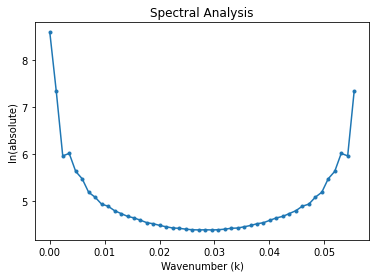

In [ ]:
plt.plot(k, ln_abs, '.-')
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Cut-off Regional, Residual, Noise from Spectra

Text(0, 0.5, 'ln(absolute)')

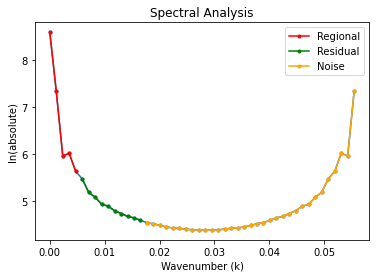

In [ ]:
# guess the cutoff !!!
reg_cut = 5
res_cut = 15

k_reg_cut = k[:reg_cut]; ln_reg_cut = ln_abs[:reg_cut]
k_res_cut = k[reg_cut:res_cut]; ln_res_cut = ln_abs[reg_cut:res_cut]
k_noise_cut = k[res_cut:]; ln_noise_cut = ln_abs[res_cut:]

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')

plt.legend((p1[0], p2[0], p3[0]), ['Regional', 'Residual', 'Noise'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Determine window for Moving Average

### Regression Function

In [ ]:
def simple_linear_regression_traditional(x, y):
  import numpy as np
  x = np.array(x); y = np.array(y)
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  err_x = x - mean_x
  err_y = y - mean_y
  err_mult = err_x * err_y
  numerator = np.sum(err_mult)
  err_x_squared = err_x**2
  denominator = np.sum(err_x_squared)
  B1 = numerator / denominator
  B0 = mean_y - B1 * mean_x

  return(B0, B1) # B0 intercept, B1 gradient

### Regression, Calculate Cutt-off Frequency, Calculate Window

In [ ]:
#Regional Zone
B0, B1=simple_linear_regression_traditional(k_reg_cut, ln_reg_cut)

#Residual Zone
B2, B3=simple_linear_regression_traditional(k_res_cut, ln_res_cut)

# cut-off
cut_off = (B2-B0)/(B1-B3)

# window
windows = 2*np.pi/((fourier_data.Interval[3]-fourier_data.Interval[2])*cut_off)

print("Calculated window: ",windows, "\n")
print("Intercept for Regional Zone: ",B0)
print("Gradient for Regional Zone: ",B1)
print("Intercept for Residual Zone: ",B2)
print("Gradient for Residual Zone: ",B3)
print("Cut-off frequency: ",cut_off)

Calculated window:  12.359083703822629 

Intercept for Regional Zone:  8.150365963565376
Gradient for Regional Zone:  -611.9543764354072
Intercept for Residual Zone:  5.736710318455438
Gradient for Residual Zone:  -74.19594854023804
Cut-off frequency:  0.004488364142533637


### Windowing rule

Window must be an **odd number**. Rule and example:

* 1.25 rounded to 1. 1 is odd, so window = 1
* 1.75 rounded to 2. 2 is even, so window = 2 - 1 = 1
* 2.25 rounded to 2. 2 is even, so window = 2 + 1 = 3
* 2.75 rounded to 3. 3 is even, so window = 3

In [ ]:
rounded = np.round(windows)

if rounded % 2 == 0:
  # even
  if (rounded - windows) > 0:
    window = rounded - 1
  if (rounded - windows) < 0:
    window = rounded + 1
else:
  # odd
  window = rounded

print("Selected odd window is:", window)

Selected odd window is: 13.0


### Plot Regression of Spectrum

Text(0, 0.5, 'ln(absolute)')

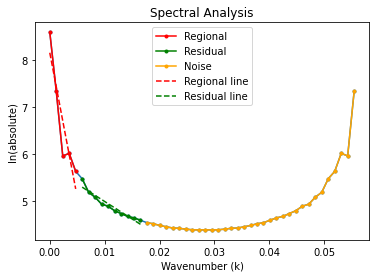

In [ ]:
y_reg = B0 + B1 * k_reg_cut
y_res = B2 + B3 * k_res_cut

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')
p4 = plt.plot(k_reg_cut, y_reg, '--', color='red')
p5 = plt.plot(k_res_cut, y_res, '--', color='green')

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ['Regional', 'Residual', 'Noise', 'Regional line', 'Residual line'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Moving Average (Regional Separation)

In [ ]:
regional = fourier_data.CBA.rolling(window=(int(window))).mean()

## Residual Separation

In [ ]:
residual = fourier_data.CBA - regional

## Print DataFrame

In [ ]:
mva = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "Interval": data.Interval, "CBA": data.CBA, "Regional": regional, "Residual": residual})
mva.head(20)

,UTM_X,UTM_Y,Interval,CBA,Regional,Residual
0,588788.047394,9.176610e+06,0.000000,172.438851,NaN,NaN
1,588788.047394,9.176723e+06,113.267551,174.426719,NaN,NaN
2,588788.047394,9.176837e+06,226.535102,176.223515,NaN,NaN
3,588788.047394,9.176950e+06,339.802653,177.415022,NaN,NaN
4,588788.047394,9.177063e+06,453.070204,177.574613,NaN,NaN
5,588788.047394,9.177176e+06,566.337755,176.047902,NaN,NaN
6,588788.047394,9.177290e+06,679.605306,173.946103,NaN,NaN
7,588788.047394,9.177403e+06,792.872857,171.682069,NaN,NaN
8,588788.047394,9.177516e+06,906.140408,169.419467,NaN,NaN
9,588788.047394,9.177629e+06,1019.407959,167.392371,NaN,NaN


## Plot CBA, Regional, Residual Slice

Text(0, 0.5, 'Regional anomaly (mgal)')

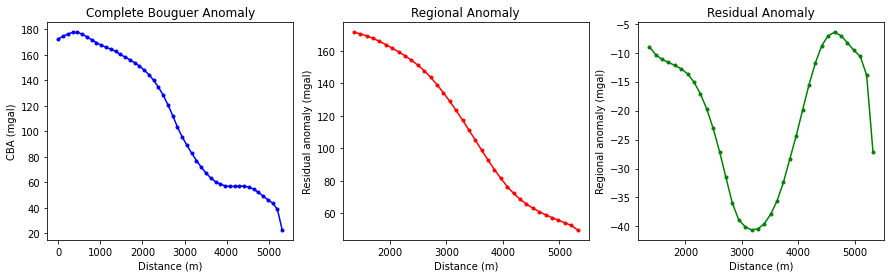

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(mva.Interval, mva.CBA, '.-', color='blue')
plt.title('Complete Bouguer Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('CBA (mgal)')
plt.subplot(1,3,2)
plt.plot(mva.Interval, mva.Regional, '.-', color='red')
plt.title('Regional Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Residual anomaly (mgal)')
plt.subplot(1,3,3)
plt.plot(mva.Interval, mva.Residual, '.-', color='green')
plt.title('Residual Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Regional anomaly (mgal)')

## Save Data into CSV

In [ ]:
mva.to_csv('/content/fft_N-S_2.csv') 

# North-South Slice 3

In [ ]:
# N-S slice

loc = 40

x_slice = []
for k in range(len(xi)):
  xslice = xi[k][loc]
  x_slice.append(float(xslice))
x_slice = np.array(x_slice)
print('Coordinate slice in X direction:', x_slice, '\n')

y_slice = []
for k in range(len(xi)):
  yslice = yi[k][k]
  y_slice.append(float(yslice))
y_slice = np.array(y_slice)
print('Coordinate slice in Y direction:', y_slice, '\n')

g_slice = []
for k in range(len(xi)):
  gslice = zi[k][loc]
  g_slice.append(float(gslice))
g_slice = np.array(g_slice)
print('CBA on slice:', g_slice)

Coordinate slice in X direction: [590903.0652102 590903.0652102 590903.0652102 590903.0652102
 590903.0652102 590903.0652102 590903.0652102 590903.0652102
 590903.0652102 590903.0652102 590903.0652102 590903.0652102
 590903.0652102 590903.0652102 590903.0652102 590903.0652102
 590903.0652102 590903.0652102 590903.0652102 590903.0652102
 590903.0652102 590903.0652102 590903.0652102 590903.0652102
 590903.0652102 590903.0652102 590903.0652102 590903.0652102
 590903.0652102 590903.0652102 590903.0652102 590903.0652102
 590903.0652102 590903.0652102 590903.0652102 590903.0652102
 590903.0652102 590903.0652102 590903.0652102 590903.0652102
 590903.0652102 590903.0652102 590903.0652102 590903.0652102
 590903.0652102 590903.0652102 590903.0652102 590903.0652102
 590903.0652102 590903.0652102] 

Coordinate slice in Y direction: [9176496.816      9176610.08355102 9176723.35110204 9176836.61865306
 9176949.88620408 9177063.1537551  9177176.42130612 9177289.68885714
 9177402.95640816 9177516.2239

**Visualize the Slice**

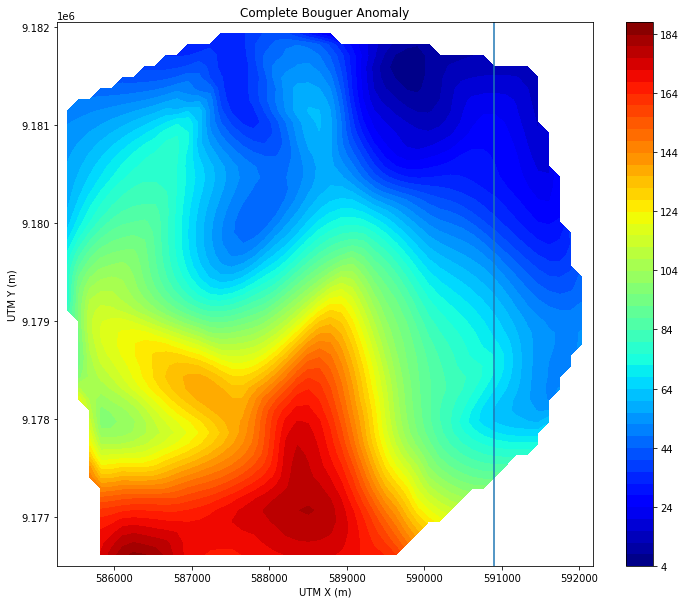

In [ ]:
import scipy
from scipy.interpolate import griddata

xi = np.linspace(min(utm_x), max(utm_x), 50)
yi = np.linspace(min(utm_y), max(utm_y), 50)
xi, yi = np.meshgrid(xi, yi)
# Interpolation
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

fig, ax = plt.subplots(figsize=(12,10))
# plot CBA contours
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.plot(x_slice, y_slice)

## Data Preparation for FFT

**Create DataFrame**

In [ ]:
data = pd.DataFrame({"UTM_X": x_slice, "UTM_Y": y_slice, "CBA": g_slice})
data.head(10)

,UTM_X,UTM_Y,CBA
0,590903.06521,9.176497e+06,NaN
1,590903.06521,9.176610e+06,NaN
2,590903.06521,9.176723e+06,NaN
3,590903.06521,9.176837e+06,NaN
4,590903.06521,9.176950e+06,NaN
5,590903.06521,9.177063e+06,NaN
6,590903.06521,9.177176e+06,NaN
7,590903.06521,9.177290e+06,NaN
8,590903.06521,9.177403e+06,90.771227
9,590903.06521,9.177516e+06,84.577607


**Remove NaN from DataFrame**

In [ ]:
# look up the number of rows with NaN data
print("Original size of data:", len(data), "rows")
print("How many data with NaN values?")
print(data.isnull().sum())

# drop rows with missing values
data.dropna(inplace=True)
# re-index dataframe
data = data.reset_index(drop=True)
print("NaN has successfully been deleted")
data.head(10)

Original size of data: 50 rows
How many data with NaN values?
UTM_X     0
UTM_Y     0
CBA      12
dtype: int64
NaN has successfully been deleted


,UTM_X,UTM_Y,CBA
0,590903.06521,9.177403e+06,90.771227
1,590903.06521,9.177516e+06,84.577607
2,590903.06521,9.177629e+06,79.252740
3,590903.06521,9.177743e+06,74.122920
4,590903.06521,9.177856e+06,68.363026
5,590903.06521,9.177969e+06,63.726855
6,590903.06521,9.178083e+06,63.280193
7,590903.06521,9.178196e+06,65.414108
8,590903.06521,9.178309e+06,68.201855
9,590903.06521,9.178422e+06,70.825031


**Calculate Iinterval on Slice**

In [ ]:
# calculate distance on slice from the first point on slice
dist_x = np.array([j-i for i, j in zip(data.UTM_X[:-1], data.UTM_X[1:])])
dist_y = np.array([j-i for i, j in zip(data.UTM_Y[:-1], data.UTM_Y[1:])])
dist = np.sqrt((dist_x**2) + (dist_y**2))
dist = np.cumsum(dist)
dist = np.append(0, dist)

**Put Interval into DataFrame**

In [ ]:
data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": dist})
data.head(10)

,UTM_X,UTM_Y,CBA,Interval
0,590903.06521,9.177403e+06,90.771227,0.000000
1,590903.06521,9.177516e+06,84.577607,113.267551
2,590903.06521,9.177629e+06,79.252740,226.535102
3,590903.06521,9.177743e+06,74.122920,339.802653
4,590903.06521,9.177856e+06,68.363026,453.070204
5,590903.06521,9.177969e+06,63.726855,566.337755
6,590903.06521,9.178083e+06,63.280193,679.605306
7,590903.06521,9.178196e+06,65.414108,792.872857
8,590903.06521,9.178309e+06,68.201855,906.140408
9,590903.06521,9.178422e+06,70.825031,1019.407959


## Fourier Transform

In [ ]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

fourier = np.fft.fft(data.CBA)
print(len(fourier))

38


In [ ]:
imaginary = fourier.imag
real = fourier.real
absolute = np.sqrt((imaginary**2) + (real**2))
ln_abs = np.log(absolute)

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute
0,590903.06521,9.177403e+06,90.771227,0.000000,1892.667267+0.000000j,1892.667267,0.000000,1892.667267,7.545742
1,590903.06521,9.177516e+06,84.577607,113.267551,-10.038562-470.092392j,-10.038562,-470.092392,470.199563,6.153157
2,590903.06521,9.177629e+06,79.252740,226.535102,56.924597-112.889048j,56.924597,-112.889048,126.429217,4.839683
3,590903.06521,9.177743e+06,74.122920,339.802653,65.310101-126.141714j,65.310101,-126.141714,142.046265,4.956153
4,590903.06521,9.177856e+06,68.363026,453.070204,73.769557-125.613512j,73.769557,-125.613512,145.673271,4.981366
5,590903.06521,9.177969e+06,63.726855,566.337755,44.949358-108.259837j,44.949358,-108.259837,117.220463,4.764056
6,590903.06521,9.178083e+06,63.280193,679.605306,36.731840-75.241029j,36.731840,-75.241029,83.728373,4.427578
7,590903.06521,9.178196e+06,65.414108,792.872857,37.820067-56.960079j,37.820067,-56.960079,68.372568,4.224972
8,590903.06521,9.178309e+06,68.201855,906.140408,41.773316-50.652119j,41.773316,-50.652119,65.655518,4.184422
9,590903.06521,9.178422e+06,70.825031,1019.407959,40.473380-40.067291j,40.473380,-40.067291,56.951579,4.042201


**Compute Sampling Frequency**

In [ ]:
# compute freq sampling
interval_last = fourier_data.Interval.iloc[-1]
minus = interval_last - fourier_data.Interval.iloc[0]

f_s = 0 # initial freq sampling
f_sample = []
for i in range(0,len(fourier_data.CBA)-1):
  f_s = f_s + (1 / minus)
  f_sample.append(float(f_s))
f_sample = np.append(0, f_sample)

# put into dataframe
fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute,FreqSample
0,590903.06521,9.177403e+06,90.771227,0.000000,1892.667267+0.000000j,1892.667267,0.000000,1892.667267,7.545742,0.000000
1,590903.06521,9.177516e+06,84.577607,113.267551,-10.038562-470.092392j,-10.038562,-470.092392,470.199563,6.153157,0.000239
2,590903.06521,9.177629e+06,79.252740,226.535102,56.924597-112.889048j,56.924597,-112.889048,126.429217,4.839683,0.000477
3,590903.06521,9.177743e+06,74.122920,339.802653,65.310101-126.141714j,65.310101,-126.141714,142.046265,4.956153,0.000716
4,590903.06521,9.177856e+06,68.363026,453.070204,73.769557-125.613512j,73.769557,-125.613512,145.673271,4.981366,0.000954
5,590903.06521,9.177969e+06,63.726855,566.337755,44.949358-108.259837j,44.949358,-108.259837,117.220463,4.764056,0.001193
6,590903.06521,9.178083e+06,63.280193,679.605306,36.731840-75.241029j,36.731840,-75.241029,83.728373,4.427578,0.001432
7,590903.06521,9.178196e+06,65.414108,792.872857,37.820067-56.960079j,37.820067,-56.960079,68.372568,4.224972,0.001670
8,590903.06521,9.178309e+06,68.201855,906.140408,41.773316-50.652119j,41.773316,-50.652119,65.655518,4.184422,0.001909
9,590903.06521,9.178422e+06,70.825031,1019.407959,40.473380-40.067291j,40.473380,-40.067291,56.951579,4.042201,0.002148


**Wavenumber**

In [ ]:
k = 2 * np.pi * f_sample

fourier_data = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "CBA": data.CBA, "Interval": data.Interval, 
                             "FFT": fourier, "Real": real, "Imaginary": imaginary, "Absolute": absolute,
                             "LnAbsolute": ln_abs, "FreqSample": f_sample, "Wavenumber": k})
fourier_data.head(10)

,UTM_X,UTM_Y,CBA,Interval,FFT,Real,Imaginary,Absolute,LnAbsolute,FreqSample,Wavenumber
0,590903.06521,9.177403e+06,90.771227,0.000000,1892.667267+0.000000j,1892.667267,0.000000,1892.667267,7.545742,0.000000,0.000000
1,590903.06521,9.177516e+06,84.577607,113.267551,-10.038562-470.092392j,-10.038562,-470.092392,470.199563,6.153157,0.000239,0.001499
2,590903.06521,9.177629e+06,79.252740,226.535102,56.924597-112.889048j,56.924597,-112.889048,126.429217,4.839683,0.000477,0.002998
3,590903.06521,9.177743e+06,74.122920,339.802653,65.310101-126.141714j,65.310101,-126.141714,142.046265,4.956153,0.000716,0.004498
4,590903.06521,9.177856e+06,68.363026,453.070204,73.769557-125.613512j,73.769557,-125.613512,145.673271,4.981366,0.000954,0.005997
5,590903.06521,9.177969e+06,63.726855,566.337755,44.949358-108.259837j,44.949358,-108.259837,117.220463,4.764056,0.001193,0.007496
6,590903.06521,9.178083e+06,63.280193,679.605306,36.731840-75.241029j,36.731840,-75.241029,83.728373,4.427578,0.001432,0.008995
7,590903.06521,9.178196e+06,65.414108,792.872857,37.820067-56.960079j,37.820067,-56.960079,68.372568,4.224972,0.001670,0.010495
8,590903.06521,9.178309e+06,68.201855,906.140408,41.773316-50.652119j,41.773316,-50.652119,65.655518,4.184422,0.001909,0.011994
9,590903.06521,9.178422e+06,70.825031,1019.407959,40.473380-40.067291j,40.473380,-40.067291,56.951579,4.042201,0.002148,0.013493


**Plot Spectrum**

Text(0, 0.5, 'ln(absolute)')

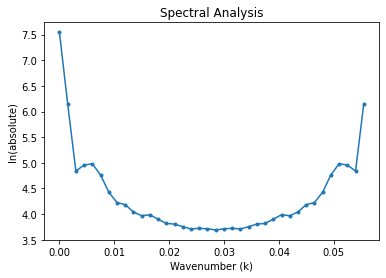

In [ ]:
plt.plot(k, ln_abs, '.-')
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Cut-off Regional, Residual, Noise from Spectra

Text(0, 0.5, 'ln(absolute)')

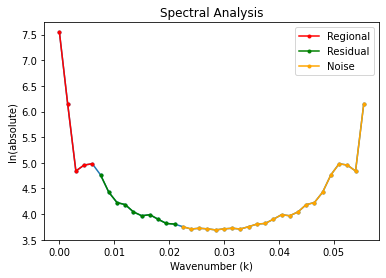

In [ ]:
# guess the cutoff !
reg_cut = 5
res_cut = 15

k_reg_cut = k[:reg_cut]; ln_reg_cut = ln_abs[:reg_cut]
k_res_cut = k[reg_cut:res_cut]; ln_res_cut = ln_abs[reg_cut:res_cut]
k_noise_cut = k[res_cut:]; ln_noise_cut = ln_abs[res_cut:]

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')

plt.legend((p1[0], p2[0], p3[0]), ['Regional', 'Residual', 'Noise'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Determine Window for Moving Average

### Regression Function

In [ ]:
#Regional Zone
B0, B1=simple_linear_regression_traditional(k_reg_cut, ln_reg_cut)

#Residual Zone
B2, B3=simple_linear_regression_traditional(k_res_cut, ln_res_cut)

# cut-off
cut_off = (B2-B0)/(B1-B3)

# window
windows = 2*np.pi/((fourier_data.Interval[3]-fourier_data.Interval[2])*cut_off)

print("Calculated window: ",windows, "\n")
print("Intercept for Regional Zone: ",B0)
print("Gradient for Regional Zone: ",B1)
print("Intercept for Residual Zone: ",B2)
print("Gradient for Residual Zone: ",B3)
print("Cut-off frequency: ",cut_off)

Calculated window:  10.133568188836394 

Intercept for Regional Zone:  6.960371573943315
Gradient for Regional Zone:  -421.9294559991804
Intercept for Residual Zone:  4.9869755981120525
Gradient for Residual Zone:  -61.43194150532972
Cut-off frequency:  0.005474090379241505


### Windowing rule

Window must be an **odd number**. Rule and example:

* 1.25 rounded to 1. 1 is odd, so window = 1
* 1.75 rounded to 2. 2 is even, so window = 2 - 1 = 1
* 2.25 rounded to 2. 2 is even, so window = 2 + 1 = 3
* 2.75 rounded to 3. 3 is even, so window = 3

In [ ]:
rounded = np.round(windows)

if rounded % 2 == 0:
  # even
  if (rounded - windows) > 0:
    window = rounded - 1
  if (rounded - windows) < 0:
    window = rounded + 1
else:
  # odd
  window = rounded

print("Selected odd window is:", window)

Selected odd window is: 11.0


### Plot Regression of Spectrum

Text(0, 0.5, 'ln(absolute)')

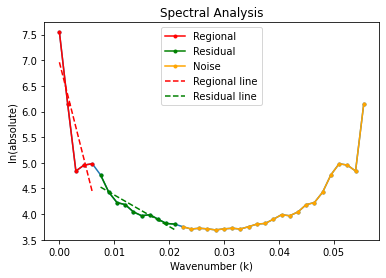

In [ ]:
y_reg = B0 + B1 * k_reg_cut
y_res = B2 + B3 * k_res_cut

plt.plot(k, ln_abs, '.-')
p1 = plt.plot(k_reg_cut, ln_reg_cut, '.-', color='red')
p2 = plt.plot(k_res_cut, ln_res_cut, '.-', color='green')
p3 = plt.plot(k_noise_cut, ln_noise_cut, '.-', color='orange')
p4 = plt.plot(k_reg_cut, y_reg, '--', color='red')
p5 = plt.plot(k_res_cut, y_res, '--', color='green')

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ['Regional', 'Residual', 'Noise', 'Regional line', 'Residual line'])
plt.title('Spectral Analysis')
plt.xlabel('Wavenumber (k)'); plt.ylabel('ln(absolute)')

## Moving Average (Regional Separation)

In [ ]:
regional = fourier_data.CBA.rolling(window=(int(window))).mean()

## Residual Separation

In [ ]:
residual = fourier_data.CBA - regional

## Print DataFrame

In [ ]:
mva = pd.DataFrame({"UTM_X": data.UTM_X, "UTM_Y": data.UTM_Y, "Interval": data.Interval, "CBA": data.CBA, "Regional": regional, "Residual": residual})
mva.head(20)

,UTM_X,UTM_Y,Interval,CBA,Regional,Residual
0,590903.06521,9.177403e+06,0.000000,90.771227,NaN,NaN
1,590903.06521,9.177516e+06,113.267551,84.577607,NaN,NaN
2,590903.06521,9.177629e+06,226.535102,79.252740,NaN,NaN
3,590903.06521,9.177743e+06,339.802653,74.122920,NaN,NaN
4,590903.06521,9.177856e+06,453.070204,68.363026,NaN,NaN
5,590903.06521,9.177969e+06,566.337755,63.726855,NaN,NaN
6,590903.06521,9.178083e+06,679.605306,63.280193,NaN,NaN
7,590903.06521,9.178196e+06,792.872857,65.414108,NaN,NaN
8,590903.06521,9.178309e+06,906.140408,68.201855,NaN,NaN
9,590903.06521,9.178422e+06,1019.407959,70.825031,NaN,NaN


## Plot CBA, Regional, Residual Slice

Text(0, 0.5, 'Regional anomaly (mgal)')

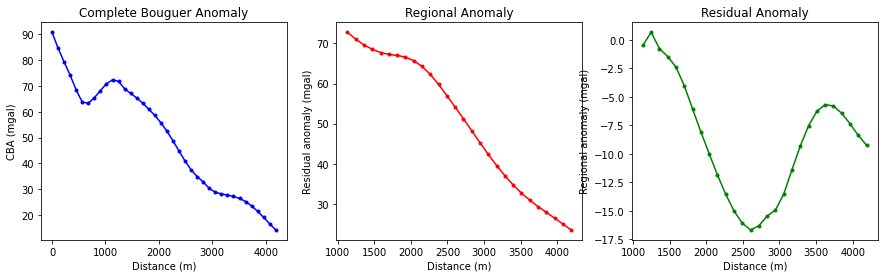

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(mva.Interval, mva.CBA, '.-', color='blue')
plt.title('Complete Bouguer Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('CBA (mgal)')
plt.subplot(1,3,2)
plt.plot(mva.Interval, mva.Regional, '.-', color='red')
plt.title('Regional Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Residual anomaly (mgal)')
plt.subplot(1,3,3)
plt.plot(mva.Interval, mva.Residual, '.-', color='green')
plt.title('Residual Anomaly')
plt.xlabel('Distance (m)'); plt.ylabel('Regional anomaly (mgal)')

## Save data into CSV

In [ ]:
mva.to_csv('/content/fft_N-S_3.csv') 

# Create 2D Map of Resulted Slices Anomalies

**Load Slices Anomaly Results in CSV Format**

In [ ]:
swne = pd.read_csv('/content/fft_SW-NE.csv')
senw = pd.read_csv('/content/fft_SE-NW.csv')
ew1 = pd.read_csv('/content/fft_E-W_1.csv')
ew2 = pd.read_csv('/content/fft_E-W_2.csv')
ew3 = pd.read_csv('/content/fft_E-W_3.csv')
ns1 = pd.read_csv('/content/fft_N-S_1.csv')
ns2 = pd.read_csv('/content/fft_N-S_2.csv')
ns3 = pd.read_csv('/content/fft_N-S_3.csv')

**Append (Concatenate) All Data**

In [ ]:
utm_x_mva = np.concatenate((swne.UTM_X, ew1.UTM_X, ew2.UTM_X, ew3.UTM_X, ns1.UTM_X, ns2.UTM_X, ns3.UTM_X), axis=0)
utm_y_mva = np.concatenate((swne.UTM_Y, ew1.UTM_Y, ew2.UTM_Y, ew3.UTM_Y, ns1.UTM_Y, ns2.UTM_Y, ns3.UTM_Y), axis=0)
CBA_mva = np.concatenate((swne.CBA, ew1.CBA, ew2.CBA, ew3.CBA, ns1.CBA, ns2.CBA, ns3.CBA), axis=0)
regional_mva = np.concatenate((swne.Regional, ew1.Regional, ew2.Regional, ew3.Regional, ns1.Regional, ns2.Regional, ns3.Regional), axis=0)
residual_mva = np.concatenate((swne.Residual, ew1.Residual, ew2.Residual, ew3.Residual, ns1.Residual, ns2.Residual, ns3.Residual), axis=0)

In [ ]:
len(CBA_mva)

306

**Gridding and Interpolating Results**

In [ ]:
import scipy
from scipy.interpolate import griddata

# Gridding
xi_mva = np.linspace(min(utm_x_mva), max(utm_x_mva), 50)
yi_mva = np.linspace(min(utm_y_mva), max(utm_y_mva), 50)
xi_mva, yi_mva = np.meshgrid(xi_mva, yi_mva)

# Interpolation
zi_cba_mva = griddata((utm_x_mva,utm_y_mva),CBA_mva,(xi_mva,yi_mva),method='cubic')
zi_reg_mva = griddata((utm_x_mva,utm_y_mva),regional_mva,(xi_mva,yi_mva),method='cubic')
zi_res_mva = griddata((utm_x_mva,utm_y_mva),residual_mva,(xi_mva,yi_mva),method='cubic')

**Plot Results (using original data coordinates utm_x and utm_y)**

In [ ]:
min_x = min(utm_x)
max_x = max(utm_x)
min_y = min(utm_y)
max_y = max(utm_y)

**Complete Bouguer Anomaly**

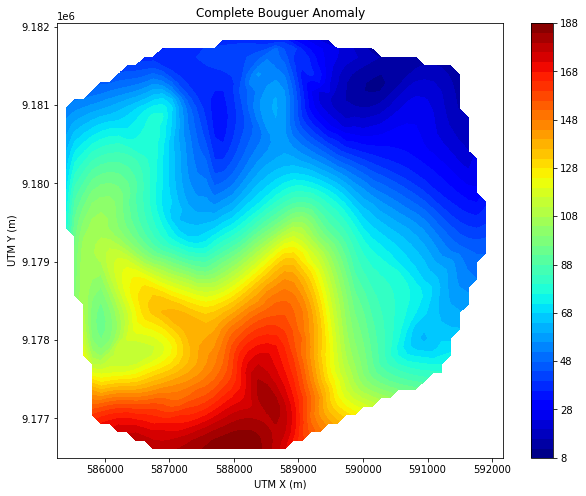

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

# plot CBA contours
im = ax.contourf(xi_mva,yi_mva,zi_cba_mva,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)
plt.colorbar(im)

**Regional Anomaly**

**Residual Anomaly**